# Data and model

In [1]:
import numpy as np
input = np.load("E:/data/nsr_vali_test.npy")
monthly_avg_temp = np.load("E:/data/monthly_avg_temp.npy")
ocean_mask = np.load('E:/data/ocean_mask.npy')


In [3]:
xr.open_dataset('E:/data/era5/nsr.nc')

<xarray.Dataset>
Dimensions:    (longitude: 1440, latitude: 721, time: 768)
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * time       (time) datetime64[ns] 1959-01-01 1959-02-01 ... 2022-12-01
Data variables:
    ssr        (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2024-01-04 04:08:26 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [7]:
import xarray as xr
xr.open_dataset('E:/data/adaptor.mars.internal-1711212651.4040644-11629-3-8a12376b-8ee4-4dbd-82ac-055849293655.nc')

<xarray.Dataset>
Dimensions:    (longitude: 1440, latitude: 721, expver: 2, time: 14)
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * expver     (expver) int32 1 5
  * time       (time) datetime64[ns] 2023-01-01 2023-02-01 ... 2024-02-01
Data variables:
    u10        (time, expver, latitude, longitude) float32 ...
    v10        (time, expver, latitude, longitude) float32 ...
    msl        (time, expver, latitude, longitude) float32 ...
    sst        (time, expver, latitude, longitude) float32 ...
    slhf       (time, expver, latitude, longitude) float32 ...
    ssr        (time, expver, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2024-03-23 16:50:53 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [16]:
xr.open_dataset('E:/data/adaptor.mars.internal-1711212651.4040644-11629-3-8a12376b-8ee4-4dbd-82ac-055849293655.nc')['u10'].shape

(14, 2, 721, 1440)

In [14]:
import xarray as xr
u10 = xr.open_dataset('E:/data/one_level_23.nc')['u10']
v10 = xr.open_dataset('E:/data/one_level_23.nc')['v10']
msl = xr.open_dataset('E:/data/one_level_23.nc')['msl']
sst = xr.open_dataset('E:/data/one_level_23.nc')['sst']
slhf = xr.open_dataset('E:/data/one_level_23.nc')['slhf']
ssr = xr.open_dataset('E:/data/one_level_23.nc')['ssr']

In [15]:
import numpy as np

u10 = np.concatenate((u10[:12, 0, :, :], u10[12:, 1, :, :]), 0)
v10 = np.concatenate((v10[:12, 0, :, :], v10[12:, 1, :, :]), 0)
msl = np.concatenate((msl[:12, 0, :, :], msl[12:, 1, :, :]), 0)
sst = np.concatenate((sst[:12, 0, :, :], sst[12:, 1, :, :]), 0)
slhf = np.concatenate((slhf[:12, 0, :, :], slhf[12:, 1, :, :]), 0)
ssr = np.concatenate((ssr[:12, 0, :, :], ssr[12:, 1, :, :]), 0)

In [16]:
import xarray as xr
hpa500 = xr.open_dataset('E:/data/multi_level_23.nc')['z']
hpa850 = xr.open_dataset('E:/data/multi_level_23.nc')['z']

hpa500 = np.concatenate((hpa500[:12, 0, 0, :, :], hpa500[12:, 1, 0, :, :]), 0)
hpa850 = np.concatenate((hpa850[:12, 0, 1, :, :], hpa850[12:, 1, 1, :, :]), 0)

In [17]:
import numpy as np
data23 = np.stack((sst, msl, slhf, u10, v10, hpa500, hpa850, ssr), 1)
np.save('E:/data/data23.npy', data23)

In [70]:
import numpy as np
input = np.load("E:/data/nsr_vali_test.npy")
input23 = np.load("E:/data/data23.npy")
monthly_avg_temp = np.load("E:/data/monthly_avg_temp.npy")
ocean_mask = np.load('E:/data/ocean_mask.npy')
input_train = np.load('E:/data/input_40train.npy')
combined_input = np.concatenate((input_train, input, input23), axis=0)

In [36]:
xr.open_dataset('E:/data/adaptor.mars.internal-1711212651.4040644-11629-3-8a12376b-8ee4-4dbd-82ac-055849293655.nc')['u10'].values[:, 0, :, :].shape

(14, 721, 1440)

In [53]:
combined_input.shape

(214, 8, 721, 1440)

In [2]:
input.shape

(160, 8, 721, 1440)

In [50]:
input23.shape

(4,)

In [180]:
ocean_mask = np.load('E:/data/ocean_mask.npy')

In [2]:
import torch
mean_all = torch.tensor([[[[ 2.8679e+02]],
                          [[ 1.0096e+05]],
                          [[-5.3626e+06]],
                          [[-5.1725e-02]],
                          [[ 1.8698e-01]],
                          [[ 5.4089e+04]],
                          [[ 1.3745e+04]],
                          [[ 1.1180e+07]]]])
std_all = torch.tensor([[[[1.1627e+01]],
                         [[1.0610e+03]],
                         [[4.9920e+06]],
                         [[3.8811e+00]],
                         [[2.4887e+00]],
                         [[3.2341e+03]],
                         [[1.3297e+03]],
                         [[7.8841e+06]]]])

In [3]:
input_data = torch.from_numpy(input)
# 标准化数据
normalized_data = (input_data - mean_all) / std_all
normalized_data[:, 0, :, :] = torch.nan_to_num(normalized_data[:, 0, :, :], nan=0.0)

In [4]:
normalized_data.shape

torch.Size([160, 8, 721, 1440])

In [183]:
torch.save(normalized_data, 'normalized_data.pt')

In [23]:
normalized_data1 = normalized_data.clone().detach()

## One month

In [107]:
import torch
from torch import nn
import numpy as np
from timm.models.layers import trunc_normal_, DropPath

from weatherlearn.models.pangu.utils.earth_position_index import get_earth_position_index
from weatherlearn.models.pangu.utils.shift_window_mask import get_shift_window_mask, window_partition, window_reverse
from weatherlearn.models.pangu.utils.patch_embed import PatchEmbed2D, PatchEmbed3D
from weatherlearn.models.pangu.utils.patch_recovery import PatchRecovery2D, PatchRecovery3D
from weatherlearn.models.pangu.utils.pad import get_pad3d
from weatherlearn.models.pangu.utils.crop import crop3d

class UpSample(nn.Module):
    """
    Up-sampling operation.
    Implementation from: https://github.com/198808xc/Pangu-Weather/blob/main/pseudocode.py

    Args:
        in_dim (int): Number of input channels.
        out_dim (int): Number of output channels.
        input_resolution (tuple[int]): [pressure levels, latitude, longitude]
        output_resolution (tuple[int]): [pressure levels, latitude, longitude]
    """

    def __init__(self, in_dim, out_dim, input_resolution, output_resolution):
        super().__init__()
        self.linear1 = nn.Linear(in_dim, out_dim * 4, bias=False)
        self.linear2 = nn.Linear(out_dim, out_dim, bias=False)
        self.norm = nn.LayerNorm(out_dim)
        self.input_resolution = input_resolution
        self.output_resolution = output_resolution

    def forward(self, x: torch.Tensor):
        """
        Args:
            x (torch.Tensor): (B, N, C)
        """
        B, N, C = x.shape
        in_pl, in_lat, in_lon = self.input_resolution
        out_pl, out_lat, out_lon = self.output_resolution

        x = self.linear1(x)
        x = x.reshape(B, in_pl, in_lat, in_lon, 2, 2, C // 2).permute(0, 1, 2, 4, 3, 5, 6)
        x = x.reshape(B, in_pl, in_lat * 2, in_lon * 2, -1)

        assert in_pl == out_pl, "the dimension of pressure level shouldn't change"
        pad_h = in_lat * 2 - out_lat
        pad_w = in_lon * 2 - out_lon

        pad_top = pad_h // 2
        pad_bottom = pad_h - pad_top

        pad_left = pad_w // 2
        pad_right = pad_w - pad_left

        x = x[:, :out_pl, pad_top: 2 * in_lat - pad_bottom, pad_left: 2 * in_lon - pad_right, :]
        x = x.reshape(x.shape[0], x.shape[1] * x.shape[2] * x.shape[3], x.shape[4])
        x = self.norm(x)
        x = self.linear2(x)
        return x


class DownSample(nn.Module):
    """
    Down-sampling operation
    Implementation from: https://github.com/198808xc/Pangu-Weather/blob/main/pseudocode.py

    Args:
        in_dim (int): Number of input channels.
        input_resolution (tuple[int]): [pressure levels, latitude, longitude]
        output_resolution (tuple[int]): [pressure levels, latitude, longitude]
    """

    def __init__(self, in_dim, input_resolution, output_resolution):
        super().__init__()
        self.linear = nn.Linear(in_dim * 4, in_dim * 2, bias=False)
        self.norm = nn.LayerNorm(4 * in_dim)
        self.input_resolution = input_resolution
        self.output_resolution = output_resolution

        in_pl, in_lat, in_lon = self.input_resolution
        out_pl, out_lat, out_lon = self.output_resolution

        assert in_pl == out_pl, "the dimension of pressure level shouldn't change"
        h_pad = out_lat * 2 - in_lat
        w_pad = out_lon * 2 - in_lon

        pad_top = h_pad // 2
        pad_bottom = h_pad - pad_top

        pad_left = w_pad // 2
        pad_right = w_pad - pad_left

        pad_front = pad_back = 0

        self.pad = nn.ZeroPad3d(
            (pad_left, pad_right, pad_top, pad_bottom, pad_front, pad_back)
        )

    def forward(self, x):
        B, N, C = x.shape
        in_pl, in_lat, in_lon = self.input_resolution
        out_pl, out_lat, out_lon = self.output_resolution
        x = x.reshape(B, in_pl, in_lat, in_lon, C)

        # Padding the input to facilitate downsampling
        x = self.pad(x.permute(0, -1, 1, 2, 3)).permute(0, 2, 3, 4, 1)
        x = x.reshape(B, in_pl, out_lat, 2, out_lon, 2, C).permute(0, 1, 2, 4, 3, 5, 6)
        x = x.reshape(B, out_pl * out_lat * out_lon, 4 * C)

        x = self.norm(x)
        x = self.linear(x)
        return x


class EarthAttention3D(nn.Module):
    """
    3D window attention with earth position bias.
    It supports both of shifted and non-shifted window.

    Args:
        dim (int): Number of input channels.
        input_resolution (tuple[int]): [pressure levels, latitude, longitude]
        window_size (tuple[int]): [pressure levels, latitude, longitude]
        num_heads (int): Number of attention heads.
        qkv_bias (bool, optional):  If True, add a learnable bias to query, key, value. Default: True
        qk_scale (float | None, optional): Override default qk scale of head_dim ** -0.5 if set
        attn_drop (float, optional): Dropout ratio of attention weight. Default: 0.0
        proj_drop (float, optional): Dropout ratio of output. Default: 0.0
    """

    def __init__(self, dim, input_resolution, window_size, num_heads, qkv_bias=True, qk_scale=None, attn_drop=0.,
                 proj_drop=0.):
        super().__init__()
        self.dim = dim
        self.window_size = window_size  # Wpl, Wlat, Wlon
        self.num_heads = num_heads
        head_dim = dim // num_heads
        self.scale = qk_scale or head_dim ** -0.5

        self.type_of_windows = (input_resolution[0] // window_size[0]) * (input_resolution[1] // window_size[1])

        self.earth_position_bias_table = nn.Parameter(
            torch.zeros((window_size[0] ** 2) * (window_size[1] ** 2) * (window_size[2] * 2 - 1),
                        self.type_of_windows, num_heads)
        )  # Wpl**2 * Wlat**2 * Wlon*2-1, Npl//Wpl * Nlat//Wlat, nH

        earth_position_index = get_earth_position_index(window_size)  # Wpl*Wlat*Wlon, Wpl*Wlat*Wlon
        self.register_buffer("earth_position_index", earth_position_index)

        self.qkv = nn.Linear(dim, dim * 3, bias=qkv_bias)
        self.attn_drop = nn.Dropout(attn_drop)
        self.proj = nn.Linear(dim, dim)
        self.proj_drop = nn.Dropout(proj_drop)

        trunc_normal_(self.earth_position_bias_table, std=.02)
        self.softmax = nn.Softmax(dim=-1)

    def forward(self, x: torch.Tensor, mask=None):
        """
        Args:
            x: input features with shape of (B * num_lon, num_pl*num_lat, N, C)
            mask: (0/-inf) mask with shape of (num_lon, num_pl*num_lat, Wpl*Wlat*Wlon, Wpl*Wlat*Wlon)
        """
        B_, nW_, N, C = x.shape
        qkv = self.qkv(x).reshape(B_, nW_, N, 3, self.num_heads, C // self.num_heads).permute(3, 0, 4, 1, 2, 5)
        q, k, v = qkv[0], qkv[1], qkv[2]

        q = q * self.scale
        attn = (q @ k.transpose(-2, -1))

        earth_position_bias = self.earth_position_bias_table[self.earth_position_index.view(-1)].view(
            self.window_size[0] * self.window_size[1] * self.window_size[2],
            self.window_size[0] * self.window_size[1] * self.window_size[2],
            self.type_of_windows, -1
        )  # Wpl*Wlat*Wlon, Wpl*Wlat*Wlon, num_pl*num_lat, nH
        earth_position_bias = earth_position_bias.permute(
            3, 2, 0, 1).contiguous()  # nH, num_pl*num_lat, Wpl*Wlat*Wlon, Wpl*Wlat*Wlon
        attn = attn + earth_position_bias.unsqueeze(0)

        if mask is not None:
            nLon = mask.shape[0]
            attn = attn.view(B_ // nLon, nLon, self.num_heads, nW_, N, N) + mask.unsqueeze(1).unsqueeze(0)
            attn = attn.view(-1, self.num_heads, nW_, N, N)
            attn = self.softmax(attn)
        else:
            attn = self.softmax(attn)

        attn = self.attn_drop(attn)

        x = (attn @ v).permute(0, 2, 3, 1, 4).reshape(B_, nW_, N, C)
        x = self.proj(x)
        x = self.proj_drop(x)
        return x


class EarthSpecificBlock(nn.Module):
    """
    3D Transformer Block
    Args:
        dim (int): Number of input channels.
        input_resolution (tuple[int]): Input resulotion.
        num_heads (int): Number of attention heads.
        window_size (tuple[int]): Window size [pressure levels, latitude, longitude].
        shift_size (tuple[int]): Shift size for SW-MSA [pressure levels, latitude, longitude].
        mlp_ratio (float): Ratio of mlp hidden dim to embedding dim.
        qkv_bias (bool, optional): If True, add a learnable bias to query, key, value. Default: True
        qk_scale (float | None, optional): Override default qk scale of head_dim ** -0.5 if set.
        drop (float, optional): Dropout rate. Default: 0.0
        attn_drop (float, optional): Attention dropout rate. Default: 0.0
        drop_path (float, optional): Stochastic depth rate. Default: 0.0
        act_layer (nn.Module, optional): Activation layer. Default: nn.GELU
        norm_layer (nn.Module, optional): Normalization layer.  Default: nn.LayerNorm
    """

    def __init__(self, dim, input_resolution, num_heads, window_size=None, shift_size=None, mlp_ratio=4.,
                 qkv_bias=True, qk_scale=None, drop=0., attn_drop=0., drop_path=0., act_layer=nn.GELU,
                 norm_layer=nn.LayerNorm):
        super().__init__()
        window_size = (2, 6, 12) if window_size is None else window_size
        shift_size = (1, 3, 6) if shift_size is None else shift_size
        self.dim = dim
        self.input_resolution = input_resolution
        self.num_heads = num_heads
        self.window_size = window_size
        self.shift_size = shift_size
        self.mlp_ratio = mlp_ratio

        self.norm1 = norm_layer(dim)
        padding = get_pad3d(input_resolution, window_size)
        self.pad = nn.ZeroPad3d(padding)

        pad_resolution = list(input_resolution)
        pad_resolution[0] += (padding[-1] + padding[-2])
        pad_resolution[1] += (padding[2] + padding[3])
        pad_resolution[2] += (padding[0] + padding[1])

        self.attn = EarthAttention3D(
            dim=dim, input_resolution=pad_resolution, window_size=window_size, num_heads=num_heads, qkv_bias=qkv_bias,
            qk_scale=qk_scale, attn_drop=attn_drop, proj_drop=drop
        )

        self.drop_path = DropPath(drop_path) if drop_path > 0. else nn.Identity()
        self.norm2 = norm_layer(dim)
        mlp_hidden_dim = int(dim * mlp_ratio)
        self.mlp = Mlp(in_features=dim, hidden_features=mlp_hidden_dim, act_layer=act_layer, drop=drop)

        shift_pl, shift_lat, shift_lon = self.shift_size
        self.roll = shift_pl and shift_lon and shift_lat

        if self.roll:
            attn_mask = get_shift_window_mask(pad_resolution, window_size, shift_size)
        else:
            attn_mask = None

        self.register_buffer("attn_mask", attn_mask)

    def forward(self, x: torch.Tensor):
        Pl, Lat, Lon = self.input_resolution
        B, L, C = x.shape
        assert L == Pl * Lat * Lon, "input feature has wrong size"

        shortcut = x
        x = self.norm1(x)
        x = x.view(B, Pl, Lat, Lon, C)

        # start pad
        x = self.pad(x.permute(0, 4, 1, 2, 3)).permute(0, 2, 3, 4, 1)

        _, Pl_pad, Lat_pad, Lon_pad, _ = x.shape

        shift_pl, shift_lat, shift_lon = self.shift_size
        if self.roll:
            shifted_x = torch.roll(x, shifts=(-shift_pl, -shift_lat, -shift_lon), dims=(1, 2, 3))
            x_windows = window_partition(shifted_x, self.window_size)
            # B*num_lon, num_pl*num_lat, win_pl, win_lat, win_lon, C
        else:
            shifted_x = x
            x_windows = window_partition(shifted_x, self.window_size)
            # B*num_lon, num_pl*num_lat, win_pl, win_lat, win_lon, C

        win_pl, win_lat, win_lon = self.window_size
        x_windows = x_windows.view(x_windows.shape[0], x_windows.shape[1], win_pl * win_lat * win_lon, C)
        # B*num_lon, num_pl*num_lat, win_pl*win_lat*win_lon, C

        attn_windows = self.attn(x_windows, mask=self.attn_mask)  # B*num_lon, num_pl*num_lat, win_pl*win_lat*win_lon, C

        attn_windows = attn_windows.view(attn_windows.shape[0], attn_windows.shape[1], win_pl, win_lat, win_lon, C)

        if self.roll:
            shifted_x = window_reverse(attn_windows, self.window_size, Pl_pad, Lat_pad, Lon_pad)
            # B * Pl * Lat * Lon * C
            x = torch.roll(shifted_x, shifts=(shift_pl, shift_lat, shift_lon), dims=(1, 2, 3))
        else:
            shifted_x = window_reverse(attn_windows, self.window_size, Pl_pad, Lat_pad, Lon_pad)
            x = shifted_x

        # crop, end pad
        x = crop3d(x.permute(0, 4, 1, 2, 3), self.input_resolution).permute(0, 2, 3, 4, 1)

        x = x.reshape(B, Pl * Lat * Lon, C)
        x = shortcut + self.drop_path(x)

        x = x + self.drop_path(self.mlp(self.norm2(x)))

        return x


class BasicLayer(nn.Module):
    """A basic 3D Transformer layer for one stage

    Args:
        dim (int): Number of input channels.
        input_resolution (tuple[int]): Input resolution.
        depth (int): Number of blocks.
        num_heads (int): Number of attention heads.
        window_size (tuple[int]): Local window size.
        mlp_ratio (float): Ratio of mlp hidden dim to embedding dim.
        qkv_bias (bool, optional): If True, add a learnable bias to query, key, value. Default: True
        qk_scale (float | None, optional): Override default qk scale of head_dim ** -0.5 if set.
        drop (float, optional): Dropout rate. Default: 0.0
        attn_drop (float, optional): Attention dropout rate. Default: 0.0
        drop_path (float | tuple[float], optional): Stochastic depth rate. Default: 0.0
        norm_layer (nn.Module, optional): Normalization layer. Default: nn.LayerNorm
    """

    def __init__(self, dim, input_resolution, depth, num_heads, window_size, mlp_ratio=4., qkv_bias=True, qk_scale=None,
                 drop=0., attn_drop=0., drop_path=0., norm_layer=nn.LayerNorm):
        super().__init__()
        self.dim = dim
        self.input_resolution = input_resolution
        self.depth = depth

        self.blocks = nn.ModuleList([
            EarthSpecificBlock(dim=dim, input_resolution=input_resolution, num_heads=num_heads, window_size=window_size,
                               shift_size=(0, 0, 0) if i % 2 == 0 else None, mlp_ratio=mlp_ratio, qkv_bias=qkv_bias,
                               qk_scale=qk_scale, drop=drop, attn_drop=attn_drop,
                               drop_path=drop_path[i] if isinstance(drop_path, list) else drop_path,
                               norm_layer=norm_layer)
            for i in range(depth)
        ])

    def forward(self, x):
        for blk in self.blocks:
            x = blk(x)
        return x


class Mlp(nn.Module):
    def __init__(self, in_features, hidden_features=None, out_features=None, act_layer=nn.GELU, drop=0.):
        super().__init__()
        out_features = out_features or in_features
        hidden_features = hidden_features or in_features
        self.fc1 = nn.Linear(in_features, hidden_features)
        self.act = act_layer()
        self.fc2 = nn.Linear(hidden_features, out_features)
        self.drop = nn.Dropout(drop)

    def forward(self, x: torch.Tensor):
        x = self.fc1(x)
        x = self.act(x)
        x = self.drop(x)
        x = self.fc2(x)
        x = self.drop(x)
        return x


class Pangu_lite(nn.Module):
    """
    Pangu A PyTorch impl of: `Pangu-Weather: A 3D High-Resolution Model for Fast and Accurate Global Weather Forecast`
    - https://arxiv.org/abs/2211.02556

    Args:
        embed_dim (int): Patch embedding dimension. Default: 192
        num_heads (tuple[int]): Number of attention heads in different layers.
        window_size (tuple[int]): Window size.
    """
    def __init__(self, embed_dim=72, num_heads=(6, 12, 12, 6), window_size=(2, 6, 12)):
        super().__init__()
        drop_path = np.linspace(0, 0.2, 8).tolist()
        # In addition, three constant masks(the topography mask, land-sea mask and soil type mask)
        self.patchembed2d = PatchEmbed2D(
            img_size=(721, 1440),
            patch_size=(4, 4),
            in_chans=4 + 3,  # add
            embed_dim=embed_dim,
        )
        self.patchembed3d = PatchEmbed3D(
            img_size=(13, 721, 1440),
            patch_size=(2, 4, 4),
            in_chans=5,
            embed_dim=embed_dim
        )

        self.patchembed_wlh = PatchEmbed3D(
            img_size=(16, 721, 1440),
            patch_size=(2, 4, 4),
            in_chans=8,
            embed_dim=embed_dim
        )

        self.layer1 = BasicLayer(
            dim=embed_dim,
            input_resolution=(8, 181, 360),
            depth=2,
            num_heads=num_heads[0],
            window_size=window_size,
            drop_path=drop_path[:2]
        )
        self.downsample = DownSample(in_dim=embed_dim, input_resolution=(8, 181, 360), output_resolution=(8, 91, 180))
        self.layer2 = BasicLayer(
            dim=embed_dim * 2,
            input_resolution=(8, 91, 180),
            depth=6,
            num_heads=num_heads[1],
            window_size=window_size,
            drop_path=drop_path[2:]
        )
        self.layer3 = BasicLayer(
            dim=embed_dim * 2,
            input_resolution=(8, 91, 180),
            depth=6,
            num_heads=num_heads[2],
            window_size=window_size,
            drop_path=drop_path[2:]
        )
        self.upsample = UpSample(embed_dim * 2, embed_dim, (8, 91, 180), (8, 181, 360))
        self.layer4 = BasicLayer(
            dim=embed_dim,
            input_resolution=(8, 181, 360),
            depth=2,
            num_heads=num_heads[3],
            window_size=window_size,
            drop_path=drop_path[:2]
        )
        # The outputs of the 2nd encoder layer and the 7th decoder layer are concatenated along the channel dimension.
        self.patchrecovery2d = PatchRecovery2D((721, 1440), (8, 8), 2 * embed_dim, 4)
        self.patchrecovery3d = PatchRecovery3D((13, 721, 1440), (2, 8, 8), 2 * embed_dim, 5)
        self.patchrecovery3d_wlh = PatchRecovery3D(img_size=(13, 721, 1440), patch_size=(1, 8, 8), in_chans=2 * embed_dim, out_chans=1)
        self.conv3d = nn.Conv3d(in_channels=1, out_channels=1, kernel_size=(3, 1, 1), stride=1, padding=0)

    def forward(self, upper_air):
        """
        Args:
            surface (torch.Tensor): 2D n_lat=721, n_lon=1440, chans=4.
            surface_mask (torch.Tensor): 2D n_lat=721, n_lon=1440, chans=3.
            upper_air (torch.Tensor): 3D n_pl=13, n_lat=721, n_lon=1440, chans=5.
        """
#        surface = torch.concat([surface, surface_mask.unsqueeze(0)], dim=1)
#        surface = torch.concat([surface, surface_mask], dim=1)
#        print(surface.shape, 'surface.shape')
#        surface = self.patchembed2d(surface)
#        print(surface.shape, 'surface.shape.after patch2d')
#        print(upper_air.shape, 'upper_air.shape')
        
        wlh_input = self.patchembed_wlh(upper_air)
        x = wlh_input

        
#        upper_air = self.patchembed3d(upper_air)
#        print(upper_air.shape, 'upper_air.shape after patch3d')
#        x = torch.concat([surface.unsqueeze(2), upper_air], dim=2)
#        print(x.shape, 'first input')
#        upper_air = self.patchembed3d(upper_air)
        
        B, C, Pl, Lat, Lon = x.shape
        x = x.reshape(B, C, -1).transpose(1, 2)

        x = self.layer1(x)

        skip = x

        x = self.downsample(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.upsample(x)
        x = self.layer4(x)

        output = torch.concat([x, skip], dim=-1)
        output = output.transpose(1, 2).reshape(B, -1, Pl, Lat, Lon)

        output = self.patchrecovery3d_wlh(output) #add
        output = self.conv3d(output)

        return output

## Three month

In [134]:
class Pangu_lite(nn.Module):
    """
    Pangu A PyTorch impl of: `Pangu-Weather: A 3D High-Resolution Model for Fast and Accurate Global Weather Forecast`
    - https://arxiv.org/abs/2211.02556

    Args:
        embed_dim (int): Patch embedding dimension. Default: 192
        num_heads (tuple[int]): Number of attention heads in different layers.
        window_size (tuple[int]): Window size.
    """
    def __init__(self, embed_dim=72, num_heads=(6, 12, 12, 6), window_size=(2, 6, 12)):
        super().__init__()
        drop_path = np.linspace(0, 0.2, 8).tolist()
        # In addition, three constant masks(the topography mask, land-sea mask and soil type mask)
        self.patchembed2d = PatchEmbed2D(
            img_size=(721, 1440),
            patch_size=(4, 4),
            in_chans=4 + 3,  # add
            embed_dim=embed_dim,
        )
        self.patchembed3d = PatchEmbed3D(
            img_size=(13, 721, 1440),
            patch_size=(2, 4, 4),
            in_chans=5,
            embed_dim=embed_dim
        )

        self.patchembed_wlh = PatchEmbed3D(
            img_size=(16, 721, 1440),
            patch_size=(2, 4, 4),
            in_chans=8,
            embed_dim=embed_dim
        )

        self.layer1 = BasicLayer(
            dim=embed_dim,
            input_resolution=(8, 181, 360),
            depth=2,
            num_heads=num_heads[0],
            window_size=window_size,
            drop_path=drop_path[:2]
        )
        self.downsample = DownSample(in_dim=embed_dim, input_resolution=(8, 181, 360), output_resolution=(8, 91, 180))
        self.layer2 = BasicLayer(
            dim=embed_dim * 2,
            input_resolution=(8, 91, 180),
            depth=6,
            num_heads=num_heads[1],
            window_size=window_size,
            drop_path=drop_path[2:]
        )
        self.layer3 = BasicLayer(
            dim=embed_dim * 2,
            input_resolution=(8, 91, 180),
            depth=6,
            num_heads=num_heads[2],
            window_size=window_size,
            drop_path=drop_path[2:]
        )
        self.upsample = UpSample(embed_dim * 2, embed_dim, (8, 91, 180), (8, 181, 360))
        self.layer4 = BasicLayer(
            dim=embed_dim,
            input_resolution=(8, 181, 360),
            depth=2,
            num_heads=num_heads[3],
            window_size=window_size,
            drop_path=drop_path[:2]
        )
        # The outputs of the 2nd encoder layer and the 7th decoder layer are concatenated along the channel dimension.
        self.patchrecovery2d = PatchRecovery2D((721, 1440), (8, 8), 2 * embed_dim, 4)
        self.patchrecovery3d = PatchRecovery3D((13, 721, 1440), (2, 8, 8), 2 * embed_dim, 5)
        self.patchrecovery3d_wlh = PatchRecovery3D(img_size=(13, 721, 1440), patch_size=(1, 8, 8), in_chans=2 * embed_dim, out_chans=1)

    def forward(self, upper_air):
        """
        Args:
            surface (torch.Tensor): 2D n_lat=721, n_lon=1440, chans=4.
            surface_mask (torch.Tensor): 2D n_lat=721, n_lon=1440, chans=3.
            upper_air (torch.Tensor): 3D n_pl=13, n_lat=721, n_lon=1440, chans=5.
        """
#        surface = torch.concat([surface, surface_mask.unsqueeze(0)], dim=1)
#        surface = torch.concat([surface, surface_mask], dim=1)
#        print(surface.shape, 'surface.shape')
#        surface = self.patchembed2d(surface)
#        print(surface.shape, 'surface.shape.after patch2d')
#        print(upper_air.shape, 'upper_air.shape')
        
        wlh_input = self.patchembed_wlh(upper_air)
        x = wlh_input

        
#        upper_air = self.patchembed3d(upper_air)
#        print(upper_air.shape, 'upper_air.shape after patch3d')
#        x = torch.concat([surface.unsqueeze(2), upper_air], dim=2)
#        print(x.shape, 'first input')
#        upper_air = self.patchembed3d(upper_air)
        
        B, C, Pl, Lat, Lon = x.shape
        x = x.reshape(B, C, -1).transpose(1, 2)

        x = self.layer1(x)

        skip = x

        x = self.downsample(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.upsample(x)
        x = self.layer4(x)

        output = torch.concat([x, skip], dim=-1)
        output = output.transpose(1, 2).reshape(B, -1, Pl, Lat, Lon)

        output = self.patchrecovery3d_wlh(output) #add

        return output

## Data

In [8]:
from torch.utils.data import Dataset, DataLoader
from random import randint
import torch
import torch.nn as nn
import torch.optim as optim

class WeatherDataset1(Dataset):
    def __init__(self, input_data, train=False, validation=False, test=False):
        self.input = input_data
        self.train = train
        self.validation = validation
        self.test = test
        if self.train:
            self.input = self.input[:60]  
        elif self.validation:
            self.input = self.input[-40:-20] 
        elif self.test:
            self.input = self.input[-20:] 
        print("input: ",self.input.shape)

    def __len__(self):
        if self.train:
            return 60 - 17  # 确保索引不会超出范围
        else:
            return 3
    

    def __getitem__(self, idx):
        upper_input = torch.tensor(self.input).permute(1, 0, 2, 3)[:, idx:idx + 16, :, :]
        target_surface = self.input[idx + 17, 0, :, :]
        return upper_input, target_surface    
# 模型、优化器和损失函数定义
model = Pangu_lite()
DEVICE = torch.device("cuda:0")
model.to(DEVICE)
#optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
#loss_function = nn.MSELoss()

# 创建数据集和数据加载器
# train_dataset = WeatherDataset1(normalized_data, train=True)
# train_loader = DataLoader(train_dataset, batch_size=1,shuffle=True, generator=torch.Generator(device='cpu'))

# valid_dataset = WeatherDataset1(normalized_data, validation=True)
# valid_loader = DataLoader(valid_dataset, batch_size=1, shuffle=True)

test_dataset = WeatherDataset1(normalized_data, test=True)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=True)

D:\miniconda\envs\torch\lib\site-packages\torch\functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\TensorShape.cpp:3527.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


input:  torch.Size([20, 8, 721, 1440])


In [6]:
lons = np.linspace(-180, 180, 1440)
lats = np.linspace(-90, 90, 721)
lon, lat = np.meshgrid(lons, lats)

import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Infer

## SST

In [93]:
(31 + 7) %12

2

In [139]:
# One months
tar_id = 17
month = 160 - tar_id + 1
from torch.utils.data import Dataset, DataLoader
class WeatherDatasetInfer(Dataset):
    def __init__(self, input_data, id=0, month=1):
        self.input = input_data
        self.t = month
        self.id = id

        
        self.input = self.input 
        print("input: ",self.input.shape)

    def __len__(self):
        return self.t
    

    def __getitem__(self, idx):
        upper_input = torch.tensor(self.input).permute(1, 0, 2, 3)[:, self.id + idx: self.id + idx + 16, :, :]
        target_surface = self.input[self.id + idx + 16: self.id + idx + 19, 0, :, :]
        return upper_input, target_surface

test_dataset = WeatherDatasetInfer(normalized_data, id= tar_id - 17, month=month)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)

input:  torch.Size([160, 8, 721, 1440])


In [ ]:
DEVICE = torch.device("cuda:0")
the_model = torch.load('D:/Onedrive/Acdemic/weather/model/three_0005_350ep_bc4_NTA.tar')
the_model.to(DEVICE)
rmse_list = []
r2_list = []
lead_1 = []
with torch.no_grad():
    the_model.eval()
    for step, (upper_air, target_surface) in enumerate(test_loader):
        upper_air, target_surface = upper_air.to(DEVICE), target_surface.to(DEVICE)
        output = the_model(upper_air.cuda())
        
        with torch.no_grad():


            
            # 数据处理和绘图的代码块
            sst1 = output[0, 0, 0, :, :].cpu().detach().numpy() * std_all.numpy()[0, 0, 0, 0] + mean_all.numpy()[0, 0, 0, 0]
            sst2 = target_surface[0, 0, :, :].cpu().detach().numpy() * std_all.numpy()[0, 0, 0, 0] + mean_all.numpy()[0, 0, 0, 0]

            sst1[ocean_mask] = None
            sst2[ocean_mask] = None
            ssta1 = sst1 - monthly_avg_temp[(step+12) % 12, :, :]
            ssta2 = sst2 - monthly_avg_temp[(step+12) % 12, :, :]

            rmse = np.sqrt(np.mean((sst1[~np.isnan(sst1)].flatten() - sst2[~np.isnan(sst2)].flatten())**2))
            r2 = np.corrcoef(ssta1[~np.isnan(ssta1)].flatten(), ssta2[~np.isnan(ssta2)].flatten())[0, 1]
            rmse_list.append(rmse)
            r2_list.append(r2)
            lead_1.append(output[0, 0, 0, :, :].cpu().detach().numpy())
            
            print(f"index {step + 17}, RMSE: {rmse}, r2: {r2}")
            # Custom colormap and normalization
            # cmap = plt.get_cmap('RdYlBu_r')
            # fig, axs = plt.subplots(1, 2, figsize=(16, 4))
            # cs1 = axs[0].contourf(lon, lat, ssta1, levels=np.linspace(-5, 5, num=100), cmap=cmap, extend='both')
            # cbar1 = fig.colorbar(cs1, ax=axs[0], orientation='vertical')
            # cbar1.set_label('Temperature Anomaly (°C)')
            
            # # Second subplot
            # cs2 = axs[1].contourf(lon, lat, ssta2, levels=np.linspace(-5, 5, num=100), cmap=cmap,  extend='both')
            # cbar2 = fig.colorbar(cs2, ax=axs[1], orientation='vertical')
            # cbar2.set_label('Temperature Anomaly (°C)')
            
            # # Show the figure
            # plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_14236\1554657280.py:20: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  upper_input = torch.tensor(self.input).permute(1, 0, 2, 3)[:, self.id + idx: self.id + idx + 16, :, :]


index 17, RMSE: 0.9824936389923096, r2: 0.24353732722063745
index 18, RMSE: 1.085336446762085, r2: 0.206224868242309
index 19, RMSE: 2.1825571060180664, r2: -0.014482831395725546
index 20, RMSE: 2.3455042839050293, r2: -0.018661229835494973
index 21, RMSE: 1.5699584484100342, r2: 0.10534704598891458
index 22, RMSE: 1.018546462059021, r2: 0.1545606101809689
index 23, RMSE: 1.15646231174469, r2: -0.054599766360799086
index 24, RMSE: 1.6522878408432007, r2: -0.21108334149468705
index 25, RMSE: 1.381506085395813, r2: -0.1915419160660303
index 26, RMSE: 0.7480024695396423, r2: 0.11526343961485196
index 27, RMSE: 1.5038950443267822, r2: -0.0676975663302674
index 28, RMSE: 1.6049833297729492, r2: -0.03224845843456875
index 29, RMSE: 0.9290744066238403, r2: 0.11138021443589567
index 30, RMSE: 0.7643112540245056, r2: 0.1436097439199774
index 31, RMSE: 1.9583202600479126, r2: 0.13358557007501298
index 32, RMSE: 2.3013758659362793, r2: 0.13237547482021472
index 33, RMSE: 1.523297905921936, r2: 0.

In [10]:
print(len(lead_1))

144


In [168]:
lead_1 = torch.load('lead_1.pt')
#lead_2 = torch.load('lead_2.pt')

In [20]:
torch.save(lead_1, 'lead_1.pt')

In [11]:
print(np.array(rmse_list).mean(), np.array(rmse_list).std())

1.829194 0.57331717


In [36]:
print(np.array(rmse_list).mean(), np.array(rmse_list).std())

1.8143425 0.60707617


In [12]:
print(np.array(r2_list).mean(), np.array(r2_list).std())

0.987158648958443 0.007789834858018363


In [37]:
print(np.array(r2_list).mean(), np.array(r2_list).std())

0.9870646778190901 0.008013612230796417


In [13]:
normalized_data_tep = normalized_data

In [24]:
## lead 1
r2_list, rmse_list, lead_2 =  [], [], []
for i in range(144 - 1):
    normalized_data = normalized_data1

    normalized_data[i + 16, 0, :, :] = torch.tensor(lead_1[i])
    idi = 18 + i
    test_dataset1 = WeatherDatasetInfer(normalized_data, id= idi - 17, month=1)
    test_loader1 = DataLoader(test_dataset1, batch_size=1, shuffle=False)
    with torch.no_grad():
        the_model.eval()
        
        for step, (upper_air, target_surface) in enumerate(test_loader1):
            upper_air, target_surface = upper_air.to(DEVICE), target_surface.to(DEVICE)
            output = the_model(upper_air.cuda())
            with torch.no_grad():
    
                sst1 = output[0, 0, 0, :, :].cpu().detach().numpy() * std_all.numpy()[0, 0, 0, 0]
                sst2 = target_surface[0, :, :].cpu().detach().numpy() * std_all.numpy()[0, 0, 0, 0]
    
                sst1[ocean_mask] = None
                sst2[ocean_mask] = None
    
    
                rmse = np.sqrt(np.mean((sst1[~np.isnan(sst1)].flatten() - sst2[~np.isnan(sst2)].flatten())**2))
                r2 = np.corrcoef(sst1[~np.isnan(sst1)].flatten(), sst2[~np.isnan(sst2)].flatten())[0, 1]
                rmse_list.append(rmse)
                r2_list.append(r2)
                lead_2.append(output[0, 0, 0, :, :].cpu().detach().numpy())
    
                
                print(f"index {i + 18}, RMSE: {rmse}, r2: {r2}")

input:  torch.Size([160, 8, 721, 1440])


C:\Users\wang\AppData\Local\Temp\ipykernel_48000\1220867640.py:20: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  upper_input = torch.tensor(self.input).permute(1, 0, 2, 3)[:, self.id + idx: self.id + idx + 16, :, :]


index 18, RMSE: 1.0889183282852173, r2: 0.9955737531167809


IndexError: list index out of range

In [170]:
print(np.array(rmse_list).mean(), np.array(rmse_list).std())

1.8239878 0.56105125


In [171]:
print(np.array(r2_list).mean(), np.array(r2_list).std())

0.987207989522765 0.00738946132369622


In [172]:
print(len(lead_1), len(lead_2))

144 143


In [14]:
lead_1 = torch.load('lead_1.pt')
lead_2 = torch.load('lead_2.pt')

In [24]:
torch.save(lead_2, 'lead_2.pt')

In [28]:
np.array(rmse_list).std()

0.56105125

In [29]:
np.array(r2_list).std()

0.00738946132369622

In [ ]:
class WeatherDatasetInfer(Dataset):
    def __init__(self, input_data, id=0, month=1):
        self.input = input_data
        self.t = month
        self.id = id

        
        self.input = self.input 
        print("input: ",self.input.shape)

    def __len__(self):
        return self.t
    

    def __getitem__(self, idx):
        upper_input = torch.tensor(self.input).permute(1, 0, 2, 3)[:, self.id + idx: self.id + idx + 16, :, :]
        target_surface = self.input[self.id + idx + 16, 0, :, :]
        return upper_input, target_surface

In [122]:
normalized_data.shape

torch.Size([160, 8, 721, 1440])

In [177]:
## lead 2
DEVICE = torch.device("cuda:0")
the_model = torch.load('D:/Onedrive/Acdemic/weather/model/one_0005_250ep_bc4.tar')
the_model.to(DEVICE)

r2_list, rmse_list, lead_3 =  [], [], []
for i in range(144 - 2):
    normalized_data = normalized_data1

    normalized_data[i + 16, 0, :, :] = torch.tensor(lead_1[i])
    normalized_data[i + 17, 0, :, :] = torch.tensor(lead_2[i])
    idi = 19 + i
    test_dataset1 = WeatherDatasetInfer(normalized_data, id= idi - 17, month=1)
    test_loader1 = DataLoader(test_dataset1, batch_size=1, shuffle=False)
    with torch.no_grad():
        the_model.eval()
        
        for step, (upper_air, target_surface) in enumerate(test_loader1):
            upper_air, target_surface = upper_air.to(DEVICE), target_surface.to(DEVICE)
            output = the_model(upper_air.cuda())
            with torch.no_grad():
    
                sst1 = output[0, 0, 0, :, :].cpu().detach().numpy() * std_all.numpy()[0, 0, 0, 0]
                sst2 = target_surface[0, :, :].cpu().detach().numpy() * std_all.numpy()[0, 0, 0, 0]
    
                sst1[ocean_mask] = None
                sst2[ocean_mask] = None
    
    
                rmse = np.sqrt(np.mean((sst1[~np.isnan(sst1)].flatten() - sst2[~np.isnan(sst2)].flatten())**2))
                r2 = np.corrcoef(sst1[~np.isnan(sst1)].flatten(), sst2[~np.isnan(sst2)].flatten())[0, 1]
                rmse_list.append(rmse)
                r2_list.append(r2)
                lead_3.append(output[0, 0, 0, :, :].cpu().detach().numpy())
    
                
                print(f"index {i + 19}, RMSE: {rmse}, r2: {r2}")

input:  torch.Size([160, 8, 721, 1440])


C:\Users\DELL\AppData\Local\Temp\ipykernel_40964\1805854815.py:20: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  upper_input = torch.tensor(self.input).permute(1, 0, 2, 3)[:, self.id + idx: self.id + idx + 16, :, :]


index 19, RMSE: 0.09567920863628387, r2: 0.9999664142738554
input:  torch.Size([160, 8, 721, 1440])
index 20, RMSE: 0.19539271295070648, r2: 0.9998567204495816
input:  torch.Size([160, 8, 721, 1440])
index 21, RMSE: 0.2706136703491211, r2: 0.9997297289609176
input:  torch.Size([160, 8, 721, 1440])
index 22, RMSE: 0.3388228714466095, r2: 0.9995799349482372
input:  torch.Size([160, 8, 721, 1440])
index 23, RMSE: 0.3030923902988434, r2: 0.9996695587000638
input:  torch.Size([160, 8, 721, 1440])
index 24, RMSE: 0.2008722424507141, r2: 0.9998575051342015
input:  torch.Size([160, 8, 721, 1440])
index 25, RMSE: 0.17357990145683289, r2: 0.9998941817657029
input:  torch.Size([160, 8, 721, 1440])
index 26, RMSE: 0.22504305839538574, r2: 0.9998149882121201
input:  torch.Size([160, 8, 721, 1440])
index 27, RMSE: 0.29233384132385254, r2: 0.9996903844751599
input:  torch.Size([160, 8, 721, 1440])
index 28, RMSE: 0.3590955436229706, r2: 0.9995436441332406
input:  torch.Size([160, 8, 721, 1440])
index

In [156]:
len(lead_1)

2

In [109]:
np.sum(normalized_data[18, 0, :, :].cpu().detach().numpy() - normalized_data_tep[18, 0, :, :].cpu().detach().numpy())

0.0

In [110]:
np.sum(normalized_data[18, 0, :, :].cpu().detach().numpy() - lead_2[1])

0.0

In [136]:
np.sum(upper_air[0, 0, 15, :, :].cpu().detach().numpy() - lead_2[1])

0.0

In [137]:
np.sum(upper_air[0, 0, 14, :, :].cpu().detach().numpy() - lead_1[1])

0.0

推测lead_2[1]就是源数据？？why？？

In [176]:
np.sum(normalized_data1[17, 0, :, :].cpu().detach().numpy() - lead_1[1])

0.0

In [175]:
np.sum(normalized_data1[18, 0, :, :].cpu().detach().numpy() - lead_2[1])

175.42741

In [93]:
np.sum(upper_air[0, 0, 15, :, :].cpu().detach().numpy() - normalized_data_tep[18, 0, :, :].cpu().detach().numpy())

0.0

In [85]:
np.sum(target_surface[0, :, :].cpu().detach().numpy() - normalized_data_tep[19, 0, :, :].cpu().detach().numpy())

0.0

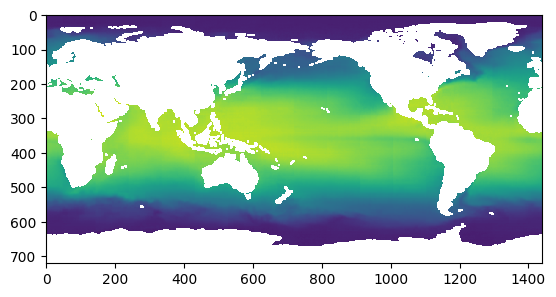

In [71]:
plt.imshow(sst2)

In [46]:
normalized_data[i + 16, 0, :, :].shape

torch.Size([721, 1440])

In [47]:
torch.tensor(lead_1[i]).shape

torch.Size([721, 1440])

In [42]:
normalized_data[i + 16, 0, :, :] = torch.tensor(lead_1[i])
normalized_data[i + 17, 0, :, :] = torch.tensor(lead_2[i])

In [49]:
torch.sum(normalized_data[i + 16, 0, :, :] - normalized_data1[i + 16, 0, :, :])

tensor(-679.5677)

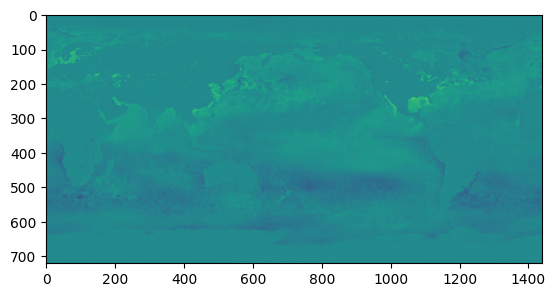

In [53]:
plt.imshow(normalized_data[i + 16, 0, :, :] - normalized_data1[i + 16, 0, :, :])

In [17]:
print(len(lead_1), len(lead_2), len(lead_3))

144 143 142


In [18]:
print(np.array(rmse_list).mean(), np.array(rmse_list).std())

1.8258175 0.5598388


In [19]:
print(np.array(r2_list).mean(), np.array(r2_list).std())

0.9871953442233595 0.007364813295994298


In [10]:
lead_1 = torch.load('lead_1.pt')
lead_2 = torch.load('lead_2.pt')

In [13]:
torch.save(lead_3, 'lead_3.pt')

In [14]:
np.array(rmse_list).mean()

1.6130934

In [15]:
np.array(r2_list).mean()

0.9805904317003952

In [ ]:
class WeatherDatasetInfer(Dataset):
    def __init__(self, input_data, id=0, month=1):
        self.input = input_data
        self.t = month
        self.id = id

        
        self.input = self.input 
        print("input: ",self.input.shape)

    def __len__(self):
        return self.t

    def __getitem__(self, idx):
        upper_input = torch.tensor(self.input).permute(1, 0, 2, 3)[:, self.id + idx: self.id + idx + 16, :, :]
        target_surface = self.input[self.id + idx + 16, 0, :, :]
        return upper_input, target_surface

In [17]:
## lead 3
DEVICE = torch.device("cuda:0")
the_model = torch.load('D:/Onedrive/Acdemic/weather/model/one_0005_250ep_bc4.tar')
the_model.to(DEVICE)

r2_list, rmse_list, lead_4 =  [], [], []
for i in range(144 - 3):
    normalized_data = normalized_data_tep

    normalized_data[i + 16, 0, :, :] = torch.tensor(lead_1[i])
    normalized_data[i + 17, 0, :, :] = torch.tensor(lead_2[i])
    normalized_data[i + 18, 0, :, :] = torch.tensor(lead_3[i])
    idi = 20 + i
    test_dataset1 = WeatherDatasetInfer(normalized_data, id= idi - 17, month=1)
    test_loader1 = DataLoader(test_dataset1, batch_size=1, shuffle=False)
    with torch.no_grad():
        the_model.eval()
        
        for step, (upper_air, target_surface) in enumerate(test_loader1):
            upper_air, target_surface = upper_air.to(DEVICE), target_surface.to(DEVICE)
            output = the_model(upper_air.cuda())
            with torch.no_grad():
    
                sst1 = output[0, 0, 0, :, :].cpu().detach().numpy() * std_all.numpy()[0, 0, 0, 0] 
                sst2 = target_surface[0, :, :].cpu().detach().numpy() * std_all.numpy()[0, 0, 0, 0] 
    
                sst1[np.flipud(ocean_mask)] = None
                sst2[np.flipud(ocean_mask)] = None
    
    
                rmse = np.sqrt(np.mean((sst1[~np.isnan(sst1)].flatten() - sst2[~np.isnan(sst2)].flatten())**2))
                r2 = np.corrcoef(sst1[~np.isnan(sst1)].flatten(), sst2[~np.isnan(sst2)].flatten())[0, 1]
                rmse_list.append(rmse)
                r2_list.append(r2)
                lead_4.append(output[0, 0, 0, :, :].cpu().detach().numpy())
    
                
                print(f"index {i + 20}, RMSE: {rmse}, r2: {r2}")

input:  torch.Size([160, 8, 721, 1440])


C:\Users\DELL\AppData\Local\Temp\ipykernel_47264\1105535799.py:20: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  upper_input = torch.tensor(self.input).permute(1, 0, 2, 3)[:, self.id + idx: self.id + idx + 16, :, :]


index 20, RMSE: 0.18592698872089386, r2: 0.9997430133033756
input:  torch.Size([160, 8, 721, 1440])
index 21, RMSE: 0.25872892141342163, r2: 0.9995105733410248
input:  torch.Size([160, 8, 721, 1440])
index 22, RMSE: 0.31519582867622375, r2: 0.9992726363706192
input:  torch.Size([160, 8, 721, 1440])
index 23, RMSE: 0.2849441468715668, r2: 0.9994146408580348
input:  torch.Size([160, 8, 721, 1440])
index 24, RMSE: 0.18772393465042114, r2: 0.9997515810245873
input:  torch.Size([160, 8, 721, 1440])
index 25, RMSE: 0.17551827430725098, r2: 0.9997907899569488
input:  torch.Size([160, 8, 721, 1440])
index 26, RMSE: 0.22418957948684692, r2: 0.9996441143847306
input:  torch.Size([160, 8, 721, 1440])
index 27, RMSE: 0.26372089982032776, r2: 0.99952456338718
input:  torch.Size([160, 8, 721, 1440])
index 28, RMSE: 0.31424134969711304, r2: 0.9993664568647203
input:  torch.Size([160, 8, 721, 1440])
index 29, RMSE: 0.3714193105697632, r2: 0.9991398341316289
input:  torch.Size([160, 8, 721, 1440])
inde

In [18]:
print(len(lead_1), len(lead_2), len(lead_3), len(lead_4))

144 143 142 141


In [10]:
lead_1 = torch.load('lead_1.pt')
lead_2 = torch.load('lead_2.pt')

In [13]:
torch.save(lead_3, 'lead_3.pt')

In [19]:
np.array(rmse_list).mean()

0.29056877

In [15]:
np.array(r2_list).mean()

0.9805904317003952

In [30]:
sst1

array([[        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       ...,
       [ 0.01126258, -0.04716759, -0.01772727, ..., -0.13656412,
         0.03214129, -0.03055098],
       [-0.11799318, -0.08117632,  0.00189568, ...,  0.00250554,
        -0.01105415,  0.0092341 ],
       [ 0.04142018, -0.01164184,  0.00399623, ..., -0.01831426,
        -0.03421014, -0.04895629]], dtype=float32)

In [26]:
                sst1 = output[0, 0, 0, :, :].cpu().detach().numpy() * std_all.numpy()[0, 0, 0, 0]
                sst2 = target_surface[0, :, :].cpu().detach().numpy() * std_all.numpy()[0, 0, 0, 0]

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32)

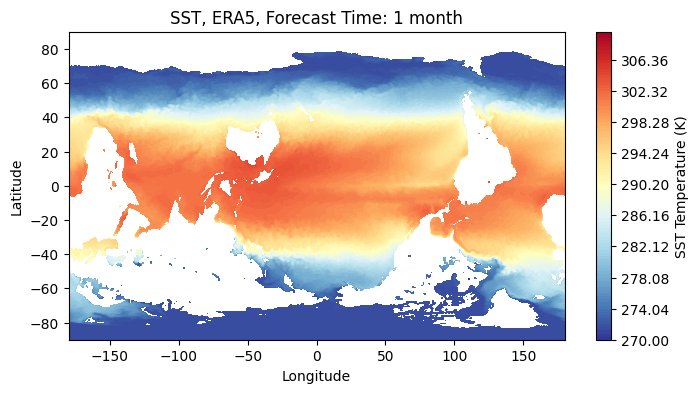

In [25]:
lons = np.linspace(-180, 180, 1440)
lats = np.linspace(-90, 90, 721)
lon, lat = np.meshgrid(lons, lats)
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Assuming 'data' is a 721x1440 matrix representing ERA5 lat/lon data
# Here I'll create a mock 'data' array as we do not have the actual data.
# The actual data should be loaded from the ERA5 dataset.


# Define the size of the figure
fig = plt.figure(figsize=(8, 4))

data = sst2+ mean_all.numpy()[0, 0, 0, 0]
# Plot the data
plt.contourf(lon, lat, data, levels=np.linspace(270, 310, num=100), cmap='RdYlBu_r')

# Add colorbar
cbar = plt.colorbar()
cbar.set_label('SST Temperature (K)')

# Add labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('SST, ERA5, Forecast Time: 1 month')
# Set the aspect of the plot to be equal

# Show the plot
plt.show()

In [123]:
import xarray as xr
lons = np.linspace(-180, 180, 1440)
lats = np.linspace(-90, 90, 721)
data1_rolled = np.roll(np.flipud(sst1), 1440 // 2, axis=1)
# Convert the numpy array to an xarray DataArray
data_xr = xr.DataArray(data1_rolled, coords=[('lat', lats), ('lon', lons)], dims=['lat', 'lon'])
data_xr1 = data_xr.coarsen(
    lat=2, 
    lon=2, 
    boundary="trim"
).mean()

D:\Onedrive\Acdemic\weather\code\utils\plot.py:1097: RuntimeWarning: Mean of empty slice
  MED = np.nanmean(da.values, axis=1)
D:\miniconda\envs\torch\lib\site-packages\numpy\lib\nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


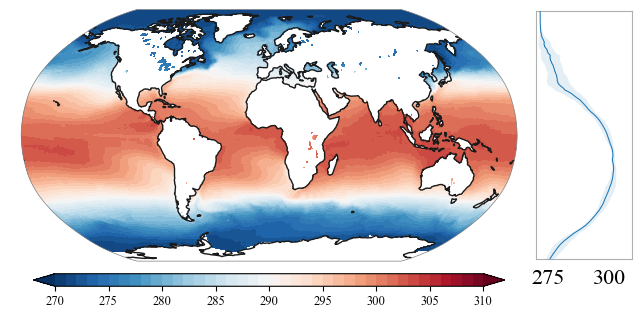

In [124]:
from utils import plot
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
import xarray as xr

fig = plt.figure()
proj = ccrs.Robinson() #ccrs.Robinson()ccrs.Mollweide()Mollweide()
ax = fig.add_subplot(111, projection=proj)
levels = np.linspace(270, 310, num=41)
plot.one_map_flat(data_xr1, ax, levels=levels, cmap="RdBu_r",  mask_ocean=False, add_coastlines=True, add_land=False,  colorbar=True, plotfunc="contourf")
ax2 = fig.add_axes([0.93, 0.237, 0.15, 0.517])
plot.add_sta(ax2, data_xr1, [270,310], 'lat')
#plt.tight_layout(rect=[0, 0, 0.9, 1])
plt.savefig(r'D:\OneDrive\Acdemic\weather\figure\map\sst_pre_1601.svg',bbox_inches='tight')


In [125]:
import xarray as xr
lons = np.linspace(-180, 180, 1440)
lats = np.linspace(-90, 90, 721)
data1_rolled = np.roll(np.flipud(sst2), 1440 // 2, axis=1)
# Convert the numpy array to an xarray DataArray
data_xr = xr.DataArray(data1_rolled, coords=[('lat', lats), ('lon', lons)], dims=['lat', 'lon'])
data_xr1 = data_xr.coarsen(
    lat=2, 
    lon=2, 
    boundary="trim"
).mean()

D:\Onedrive\Acdemic\weather\code\utils\plot.py:1097: RuntimeWarning: Mean of empty slice
  MED = np.nanmean(da.values, axis=1)
D:\miniconda\envs\torch\lib\site-packages\numpy\lib\nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


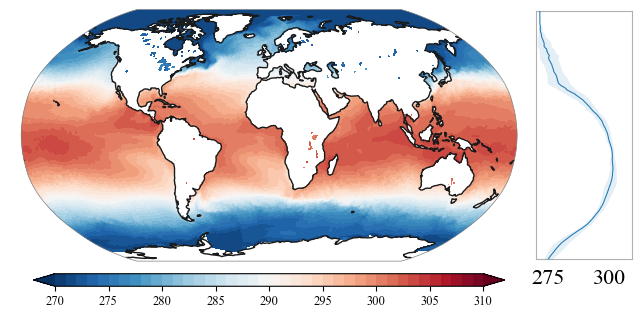

In [126]:
from utils import plot
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
import xarray as xr

fig = plt.figure()
proj = ccrs.Robinson() #ccrs.Robinson()ccrs.Mollweide()Mollweide()
ax = fig.add_subplot(111, projection=proj)
levels = np.linspace(270, 310, num=41)
plot.one_map_flat(data_xr1, ax, levels=levels, cmap="RdBu_r",  mask_ocean=False, add_coastlines=True, add_land=False,  colorbar=True, plotfunc="contourf")
ax2 = fig.add_axes([0.93, 0.237, 0.15, 0.517])
plot.add_sta(ax2, data_xr1, [270,310], 'lat')
plt.savefig(r'D:\OneDrive\Acdemic\weather\figure\map\sst_obs_1601.svg',bbox_inches='tight')

In [127]:
import xarray as xr
lons = np.linspace(-180, 180, 1440)
lats = np.linspace(-90, 90, 721)
data1_rolled = np.roll(np.flipud(ssta1), 1440 // 2, axis=1)
# Convert the numpy array to an xarray DataArray
data_xr = xr.DataArray(data1_rolled, coords=[('lat', lats), ('lon', lons)], dims=['lat', 'lon'])
data_xr1 = data_xr.coarsen(
    lat=2, 
    lon=2, 
    boundary="trim"
).mean()

D:\Onedrive\Acdemic\weather\code\utils\plot.py:1097: RuntimeWarning: Mean of empty slice
  MED = np.nanmean(da.values, axis=1)
D:\miniconda\envs\torch\lib\site-packages\numpy\lib\nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


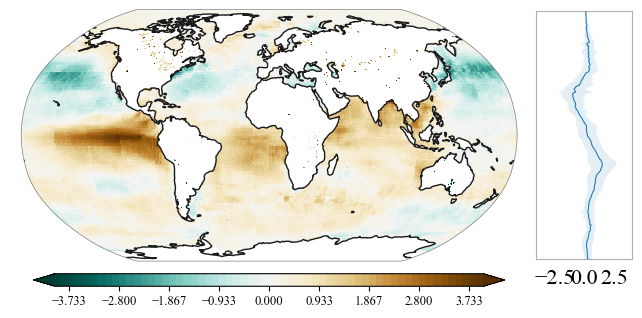

In [128]:
from utils import plot
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
import xarray as xr

fig = plt.figure()
proj = ccrs.Robinson() #ccrs.Robinson()ccrs.Mollweide()Mollweide()
ax = fig.add_subplot(111, projection=proj)
levels = np.linspace(-4, 4, num=61)
plot.one_map_flat(data_xr1, ax, levels=levels, cmap="BrBG_r",  mask_ocean=False, add_coastlines=True, add_land=False,  colorbar=True, plotfunc="pcolormesh")
ax2 = fig.add_axes([0.93, 0.237, 0.15, 0.517])
plot.add_sta(ax2, data_xr1, [-4,4], 'lat')
plt.savefig(r'D:\OneDrive\Acdemic\weather\figure\map\ssta_pre_1601.svg',bbox_inches='tight')

In [129]:
import xarray as xr
lons = np.linspace(-180, 180, 1440)
lats = np.linspace(-90, 90, 721)
data1_rolled = np.roll(np.flipud(ssta2), 1440 // 2, axis=1)
# Convert the numpy array to an xarray DataArray
data_xr = xr.DataArray(data1_rolled, coords=[('lat', lats), ('lon', lons)], dims=['lat', 'lon'])
data_xr1 = data_xr.coarsen(
    lat=2, 
    lon=2, 
    boundary="trim"
).mean()

D:\Onedrive\Acdemic\weather\code\utils\plot.py:1097: RuntimeWarning: Mean of empty slice
  MED = np.nanmean(da.values, axis=1)
D:\miniconda\envs\torch\lib\site-packages\numpy\lib\nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
D:\Onedrive\Acdemic\weather\code\utils\plot.py:1100: RuntimeWarning: divide by zero encountered in true_divide
  margin_of_error = 1.96 * (STD / np.sqrt(n))


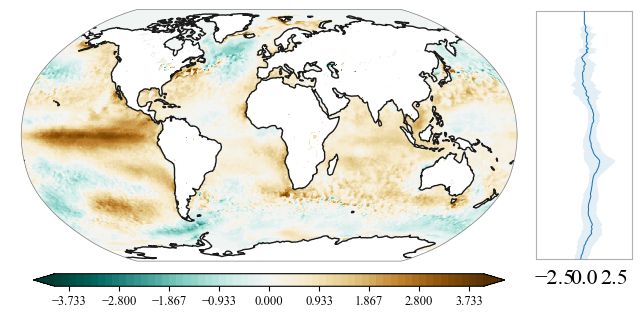

In [130]:
from utils import plot
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
import xarray as xr

fig = plt.figure()
proj = ccrs.Robinson() #ccrs.Robinson()ccrs.Mollweide()Mollweide()
ax = fig.add_subplot(111, projection=proj)
levels = np.linspace(-4, 4, num=61)
plot.one_map_flat(data_xr1, ax, levels=levels, cmap="BrBG_r",  mask_ocean=False, add_coastlines=True, add_land=False,  colorbar=True, plotfunc="pcolormesh")
ax2 = fig.add_axes([0.93, 0.237, 0.15, 0.517])
plot.add_sta(ax2, data_xr1, [-4,4], 'lat')
plt.savefig(r'D:\OneDrive\Acdemic\weather\figure\map\ssta_obs_1601.svg',bbox_inches='tight')

In [133]:
import pandas as pd
x = ssta2[~np.isnan(ssta2)].flatten()
y = ssta1[~np.isnan(ssta1)].flatten()
df = pd.DataFrame({
  'obs': x,
  'pre': y
})
pearsonr(df['obs'], df['pre'])

PearsonRResult(statistic=0.3838552883695858, pvalue=0.0)

(-4.0, 4.0, -4.0, 4.0)

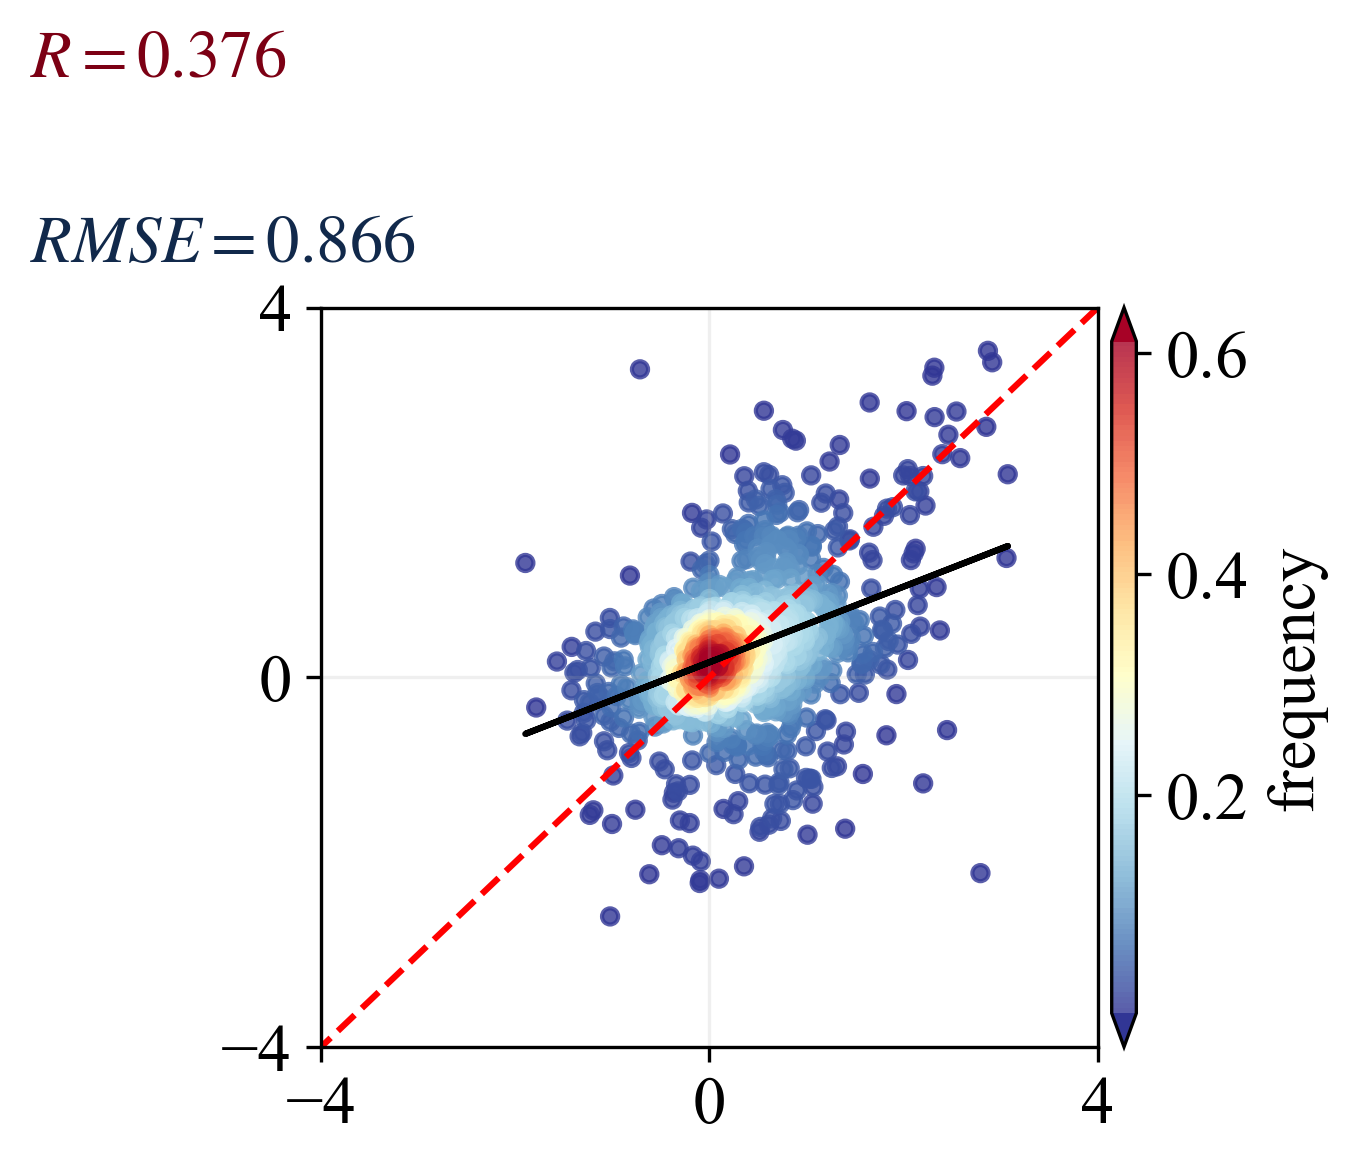

In [132]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from matplotlib import rcParams
from statistics import mean
from sklearn.metrics import explained_variance_score,r2_score,median_absolute_error,mean_squared_error,mean_absolute_error
from scipy.stats import pearsonr
import cmaps
from matplotlib.ticker import MultipleLocator
# 加载数据（PS：原始数据太多，采样10000）
# 默认是读取csv/xlsx的列成DataFrame


config = {"font.family":'Times New Roman',"font.size": 16,"mathtext.fontset":'stix'}
rcParams.update(config)


df = df.sample(1000)
# 用于计算指标
x = df['obs']; y = df['pre']

BIAS = mean(x - y)
MSE = mean_squared_error(x, y)
RMSE = np.power(MSE, 0.5)
R2 = pearsonr(x, y).statistic
adjR2 = 1-((1-r2_score(x,y))*(len(x)-1))/(len(x)-5-1)
MAE = mean_absolute_error(x, y)
EV = explained_variance_score(x, y)
NSE = 1 - (RMSE ** 2 / np.var(x))
# 计算散点密度
xy = np.vstack([x, y])
z = stats.gaussian_kde(xy)(xy)
idx = z.argsort()
x, y, z = x.iloc[idx], y.iloc[idx], z[idx] 

# 拟合（若换MK，自行操作）最小二乘
def slope(xs, ys):
    m = (((mean(xs) * mean(ys)) - mean(xs * ys)) / ((mean(xs) * mean(xs)) - mean(xs * xs)))
    b = mean(ys) - m * mean(xs)
    return m, b
k, b = slope(x, y)
regression_line = []
for a in x:
    regression_line.append((k * a) + b)
slope, intercept = np.polyfit(x, regression_line, 1)
n = 1


fig, ax = plt.subplots(figsize=(4, 3.2), dpi=300)
scatter = ax.scatter(x, y, marker='o', c=z, edgecolors=None, s=15, cmap=cmaps.MPL_RdYlBu_r,  alpha=0.8)
cbar = plt.colorbar(scatter, shrink=1, orientation='vertical', extend='both', pad=0.015, aspect=30, label='frequency')
plt.plot([-8, 8], [-8, 8], 'red', lw=1.5, linestyle='--', label='1:1 line')  # 画的1:1线，线的颜色为black，线宽为0.8
plt.plot(x, regression_line, 'black', lw=1.5, label='Regression Line')  # 预测与实测数据之间的回归线
ax.grid(True, linestyle='-', alpha=0.2)
ax.xaxis.set_major_locator(MultipleLocator(4))
ax.yaxis.set_major_locator(MultipleLocator(4))

plt.text(-7,6.5, '$R=%.3f$' % R2, family = 'Times New Roman', horizontalalignment='left', color='#7c0014')
plt.text(-7,4.5, '$RMSE=%.3f$' % RMSE, family = 'Times New Roman', horizontalalignment='left', color='#11294b')




plt.axis([-4, 4, -4, 4])  # 设置线的范围
#ax.legend(loc='upper left', frameon = False)
#plt.savefig('D:/Onedrive/Acdemic/weather/figure/map/ssta_scatter.svg', format="svg", dpi=300, bbox_inches = 'tight')
#plt.show()

## ACC 3month

In [237]:
# Three months
from torch.utils.data import Dataset, DataLoader
class WeatherDatasetr3Infer(Dataset):
    def __init__(self, input_data, idx):
        self.input = input_data
        self.idx = idx
        print("input: ",self.input.shape)

    def __len__(self):
        return 1
        
    def __getitem__(self, idx):
        upper_input = torch.tensor(self.input).permute(1, 0, 2, 3)[:, self.idx:self.idx + 16, :, :]
        target_surface = self.input[self.idx + 17: self.idx + 20, 0, :, :]
        return upper_input, target_surface    

test_dataset = WeatherDatasetr3Infer(normalized_data, idx=110 - 1 - 16)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)

input:  torch.Size([160, 8, 721, 1440])


C:\Users\wang\AppData\Local\Temp\ipykernel_5308\3943384228.py:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  upper_input = torch.tensor(self.input).permute(1, 0, 2, 3)[:, self.idx:self.idx + 16, :, :]


torch.Size([1, 1, 3, 721, 1440]) torch.Size([1, 3, 721, 1440])
271.45966
infer:0.7761030793190002 v.s. ERA5obs:0.9267895221710205


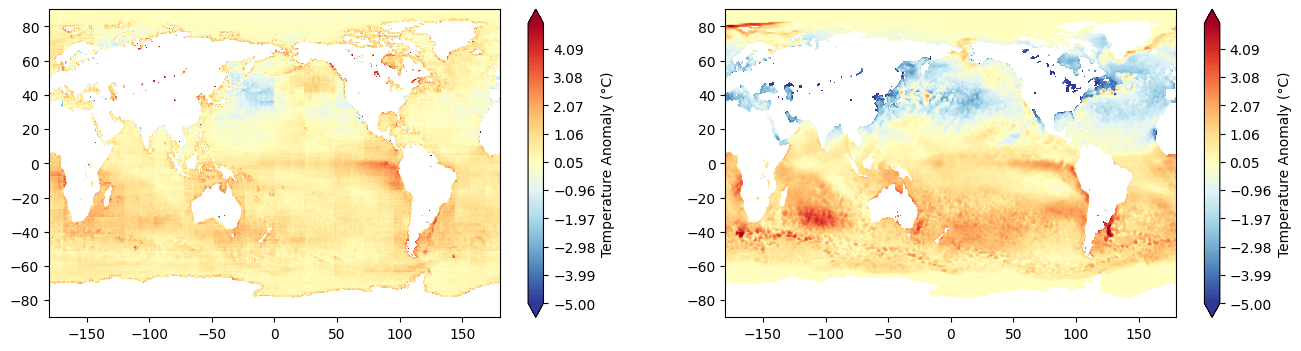

271.46027
infer:0.9149301648139954 v.s. ERA5obs:0.783184826374054


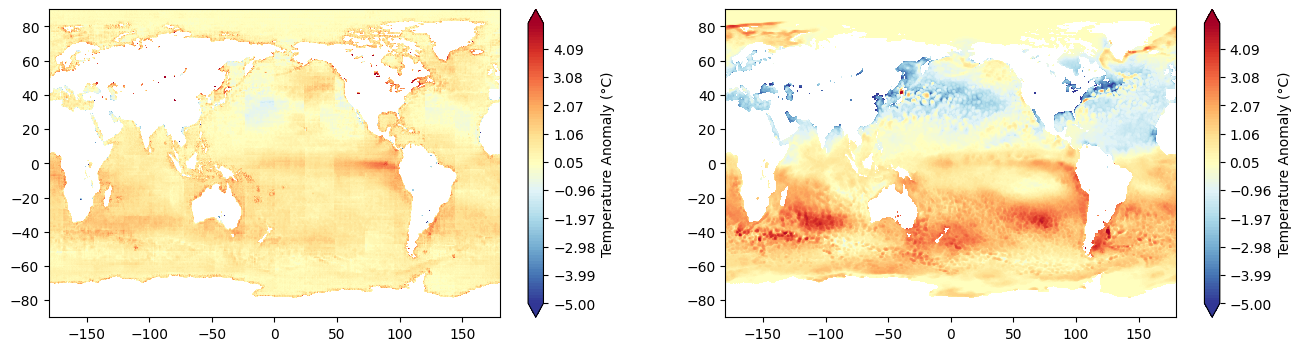

271.46088
infer:0.8641870021820068 v.s. ERA5obs:0.6382771134376526


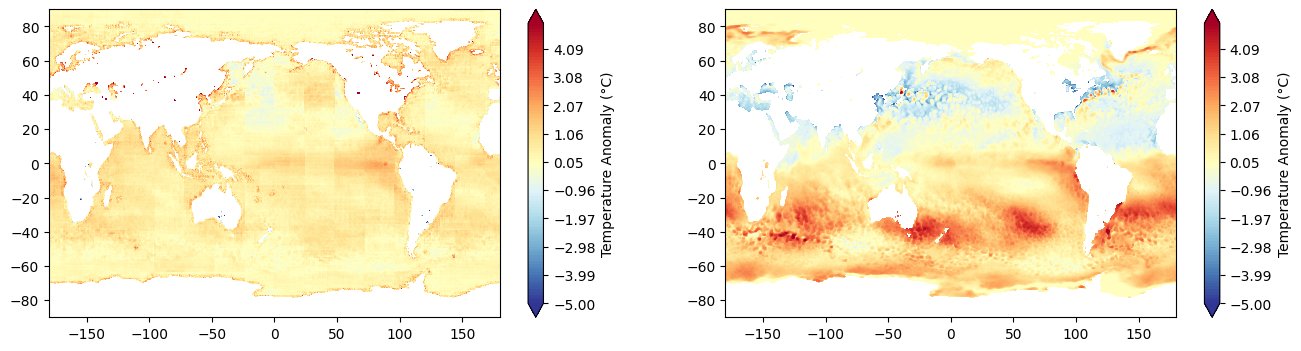

In [238]:
DEVICE = torch.device("cuda:0")
the_model = torch.load('E:/Onedrive/Acdemic/weather/model/three_0005_250ep_bc4.tar')
the_model.to(DEVICE)
with torch.no_grad():
    the_model.eval()
    for step,(upper_air, target_surface) in enumerate(test_loader):
        upper_air, target_surface = upper_air.to(DEVICE), target_surface.to(DEVICE)
        output = the_model(upper_air.cuda())
        normalized_data1[70:73, 0, :, :] = output[0, 0, :, :, :].cpu().detach()
        with torch.no_grad():
            print(output.shape, target_surface.shape)
            for i in range(3):
                # Define the size of the figure
                # 设置图形的大小
                fig, axs = plt.subplots(1, 2, figsize=(16, 4))
                
                # 数据处理和绘图的代码块
                data1 = np.flipud(output[0, 0, i, :, :].cpu().detach().numpy() * \
                                  std_all.numpy()[0, 0, 0, 0] + mean_all.numpy()[0, 0, 0, 0] - monthly_avg_temp[(9+i)%12, :, :])
                data2 = np.flipud(target_surface[0, i, :, :].cpu().detach().numpy() * \
                                  std_all.numpy()[0, 0, 0, 0] + mean_all.numpy()[0, 0, 0, 0] - monthly_avg_temp[(9+i)%12, :, :])
                print(target_surface[0, i, :, :].cpu().detach().numpy()[0,0] * \
                                  std_all.numpy()[0, 0, 0, 0] + mean_all.numpy()[0, 0, 0, 0])
                data1[np.flipud(ocean_mask)] = None
                data2[np.flipud(ocean_mask)] = None
                tempdata1 = np.flipud(data1)[340:380 ,760:960]
                tempdata2 = np.flipud(data2)[340:380 ,760:960]
                print("infer:{} v.s. ERA5obs:{}".format(np.nanmean(tempdata1), np.nanmean(tempdata2)))
                # Custom colormap and normalization
                cmap = plt.get_cmap('RdYlBu_r')
                
                # Assuming your data is already processed as 'data1' and 'data2'
                
                # First subplot
                cs1 = axs[0].contourf(lon, lat, data1, levels=np.linspace(-5, 5, num=100), cmap=cmap, extend='both')
                cbar1 = fig.colorbar(cs1, ax=axs[0], orientation='vertical')
                cbar1.set_label('Temperature Anomaly (°C)')
                
                # Second subplot
                cs2 = axs[1].contourf(lon, lat, data2, levels=np.linspace(-5, 5, num=100), cmap=cmap,  extend='both')
                cbar2 = fig.colorbar(cs2, ax=axs[1], orientation='vertical')
                cbar2.set_label('Temperature Anomaly (°C)')
                
                # Show the figure
                plt.show()

In [198]:
# Three months
from torch.utils.data import Dataset, DataLoader
class WeatherDatasetr3Infer(Dataset):
    def __init__(self, input_data, idx):
        self.input = input_data
        self.idx = idx
        print("input: ",self.input.shape)

    def __len__(self):
        return 1
        
    def __getitem__(self, idx):
        upper_input = torch.tensor(self.input).permute(1, 0, 2, 3)[:, self.idx:self.idx + 16, :, :]
        target_surface = self.input[self.idx + 17: self.idx + 20, 0, :, :]
        return upper_input, target_surface    

test_dataset = WeatherDatasetr3Infer(normalized_data1, idx=71 + 3 - 1 - 17)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)

input:  torch.Size([160, 8, 721, 1440])


C:\Users\wang\AppData\Local\Temp\ipykernel_5308\1184612506.py:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  upper_input = torch.tensor(self.input).permute(1, 0, 2, 3)[:, self.idx:self.idx + 16, :, :]


torch.Size([1, 1, 3, 721, 1440]) torch.Size([1, 3, 721, 1440])
271.45966
infer:1.421605110168457 v.s. ERA5obs:2.48421049118042


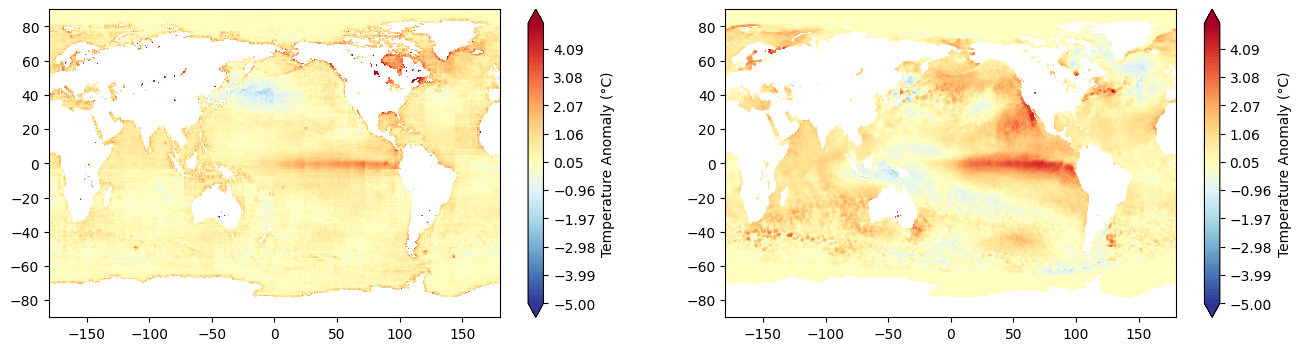

271.45966
infer:2.0066640377044678 v.s. ERA5obs:2.852215528488159


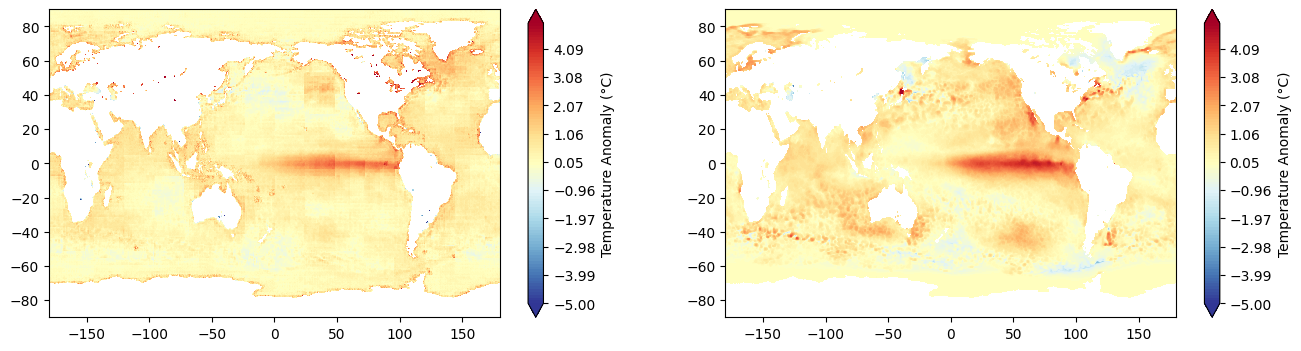

271.46027
infer:2.1651532649993896 v.s. ERA5obs:2.7152621746063232


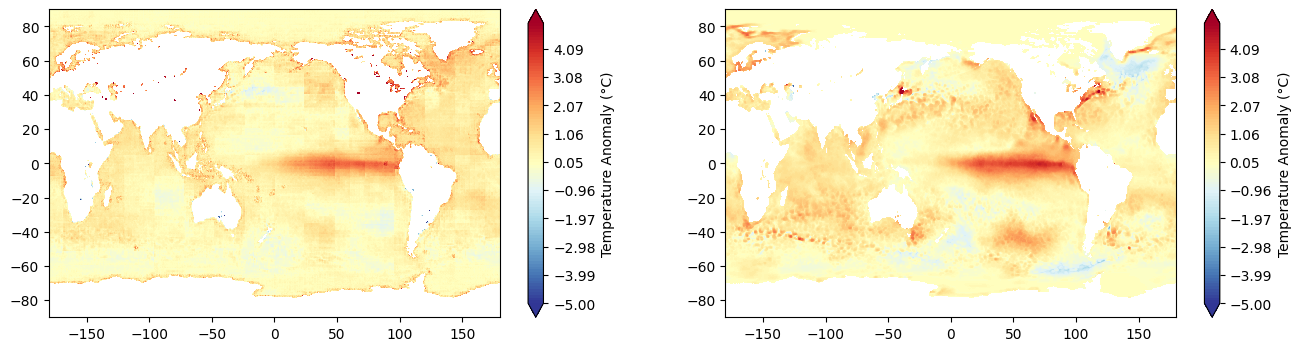

In [199]:
DEVICE = torch.device("cuda:0")
the_model = torch.load('E:/Onedrive/Acdemic/weather/model/three_0005_250ep_bc4.tar')
the_model.to(DEVICE)
with torch.no_grad():
    the_model.eval()
    for step,(upper_air, target_surface) in enumerate(test_loader):
        upper_air, target_surface = upper_air.to(DEVICE), target_surface.to(DEVICE)
        output = the_model(upper_air.cuda())
#        normalized_data1[70:73, 0, :, :] = output[0, 0, :, :, :].cpu().detach()
        with torch.no_grad():
            print(output.shape, target_surface.shape)
            for i in range(3):
                # Define the size of the figure
                # 设置图形的大小
                fig, axs = plt.subplots(1, 2, figsize=(16, 4))
                
                # 数据处理和绘图的代码块
                data1 = np.flipud(output[0, 0, i, :, :].cpu().detach().numpy() * \
                                  std_all.numpy()[0, 0, 0, 0] + mean_all.numpy()[0, 0, 0, 0] - monthly_avg_temp[(6+i+3)%12, :, :])
                data2 = np.flipud(target_surface[0, i, :, :].cpu().detach().numpy() * \
                                  std_all.numpy()[0, 0, 0, 0] + mean_all.numpy()[0, 0, 0, 0] - monthly_avg_temp[(6+i+3)%12, :, :])
                print(target_surface[0, i, :, :].cpu().detach().numpy()[0,0] * \
                                  std_all.numpy()[0, 0, 0, 0] + mean_all.numpy()[0, 0, 0, 0])
                data1[np.flipud(ocean_mask)] = None
                data2[np.flipud(ocean_mask)] = None
                tempdata1 = np.flipud(data1)[340:380 ,760:960]
                tempdata2 = np.flipud(data2)[340:380 ,760:960]
                print("infer:{} v.s. ERA5obs:{}".format(np.nanmean(tempdata1), np.nanmean(tempdata2)))
                # Custom colormap and normalization
                cmap = plt.get_cmap('RdYlBu_r')
                
                # Assuming your data is already processed as 'data1' and 'data2'
                
                # First subplot
                cs1 = axs[0].contourf(lon, lat, data1, levels=np.linspace(-5, 5, num=100), cmap=cmap, extend='both')
                cbar1 = fig.colorbar(cs1, ax=axs[0], orientation='vertical')
                cbar1.set_label('Temperature Anomaly (°C)')
                
                # Second subplot
                cs2 = axs[1].contourf(lon, lat, data2, levels=np.linspace(-5, 5, num=100), cmap=cmap,  extend='both')
                cbar2 = fig.colorbar(cs2, ax=axs[1], orientation='vertical')
                cbar2.set_label('Temperature Anomaly (°C)')
                
                # Show the figure
                plt.show()

In [184]:
target_surface.shape

torch.Size([1, 3, 721, 1440])

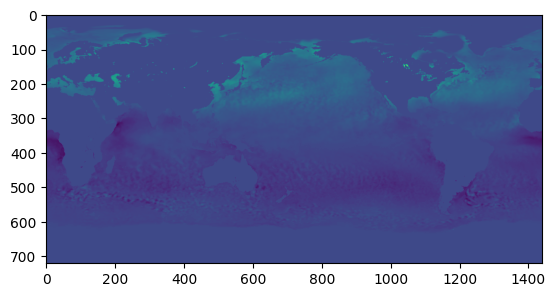

In [189]:
plt.imshow(a - b)

In [147]:
a = target_surface[0, i, :, :].cpu().detach().numpy()* \
                                  std_all.numpy()[0, 0, 0, 0] + mean_all.numpy()[0, 0, 0, 0]
a

array([[271.45966, 271.45966, 271.45966, ..., 271.45966, 271.45966,
        271.45966],
       [271.45966, 271.45966, 271.45966, ..., 271.45966, 271.45966,
        271.45966],
       [271.45966, 271.45966, 271.45966, ..., 271.45966, 271.45966,
        271.45966],
       ...,
       [286.79   , 286.79   , 286.79   , ..., 286.79   , 286.79   ,
        286.79   ],
       [286.79   , 286.79   , 286.79   , ..., 286.79   , 286.79   ,
        286.79   ],
       [286.79   , 286.79   , 286.79   , ..., 286.79   , 286.79   ,
        286.79   ]], dtype=float32)

In [148]:
b = input[73, 0, :, :]
b

array([[271.45966, 271.45966, 271.45966, ..., 271.45966, 271.45966,
        271.45966],
       [271.45966, 271.45966, 271.45966, ..., 271.45966, 271.45966,
        271.45966],
       [271.45966, 271.45966, 271.45966, ..., 271.45966, 271.45966,
        271.45966],
       ...,
       [      nan,       nan,       nan, ...,       nan,       nan,
              nan],
       [      nan,       nan,       nan, ...,       nan,       nan,
              nan],
       [      nan,       nan,       nan, ...,       nan,       nan,
              nan]], dtype=float32)

In [145]:
i

2

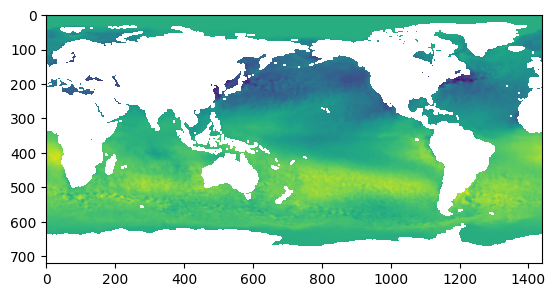

In [149]:
plt.imshow(a-b)

In [89]:
tempdata = np.flipud(data1)[340:380 ,60:860]
np.nanmean(tempdata)

-0.0933124

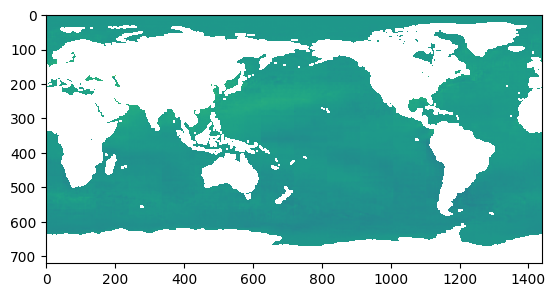

In [84]:
plt.imshow(np.flipud(data1))

## 2024

In [1]:
import numpy as np
input = np.load("E:/data/nsr_vali_test.npy")
input23 = np.load("E:/data/data23.npy")
monthly_avg_temp = np.load("E:/data/monthly_avg_temp.npy")
ocean_mask = np.load('E:/data/ocean_mask.npy')
input_train = np.load('E:/data/input_40train.npy')
combined_input = np.concatenate((input_train, input, input23), axis=0)

In [3]:
input23.shape

(14, 8, 721, 1440)

In [2]:
import torch
mean_all = torch.tensor([[[[ 2.8679e+02]],
                          [[ 1.0096e+05]],
                          [[-5.3626e+06]],
                          [[-5.1725e-02]],
                          [[ 1.8698e-01]],
                          [[ 5.4089e+04]],
                          [[ 1.3745e+04]],
                          [[ 1.1180e+07]]]])
std_all = torch.tensor([[[[1.1627e+01]],
                         [[1.0610e+03]],
                         [[4.9920e+06]],
                         [[3.8811e+00]],
                         [[2.4887e+00]],
                         [[3.2341e+03]],
                         [[1.3297e+03]],
                         [[7.8841e+06]]]])

In [3]:
input_data = torch.from_numpy(combined_input)
# 标准化数据
normalized_data = (input_data - mean_all) / std_all
normalized_data[:, 0, :, :] = torch.nan_to_num(normalized_data[:, 0, :, :], nan=0.0)

In [4]:
normalized_data1 = normalized_data.clone().detach()

In [20]:
combined_input.shape

(214, 8, 721, 1440)

In [30]:
normalized_data.shape

torch.Size([214, 8, 721, 1440])

In [32]:
new_data = normalized_data[-1, 1:, :, :]
new_data.shape

torch.Size([7, 721, 1440])

In [34]:
output[0, 0, i, :, :].cpu().detach().unsqueeze(0).shape

torch.Size([1, 721, 1440])

In [35]:
data_ex = torch.cat((output[0, 0, i, :, :].cpu().detach().unsqueeze(0), normalized_data[-1, 1:, :, :]), dim=0)

In [38]:
normalized_data2 = torch.cat((normalized_data1, data_ex.unsqueeze(0)), 0)

In [9]:
# Three months
tar_id = 215


from torch.utils.data import Dataset, DataLoader
class WeatherDatasetInfer(Dataset):
    def __init__(self, input_data, id=0, month=1):
        self.input = input_data
        self.t = month
        self.id = id

        
        self.input = self.input 
        print("input: ",self.input.shape)

    def __len__(self):
        return self.t
    

    def __getitem__(self, idx):
        upper_input = torch.tensor(self.input).permute(1, 0, 2, 3)[:, self.id + idx: self.id + idx + 16, :, :]
        target_surface = self.input[self.id + idx + 16: self.id + idx + 19, 0, :, :]
        return upper_input, target_surface

test_dataset = WeatherDatasetInfer(normalized_data1, id= tar_id - 17, month=1)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)

input:  torch.Size([214, 8, 721, 1440])


In [10]:
# infer 3month

DEVICE = torch.device("cuda:0")
the_model = torch.load('D:/Onedrive/Acdemic/weather/model/three_0005_350ep_bc4.tar')
the_model.to(DEVICE)
mse = []
tar = False
datanc2 = []
#datanc3 = []
#obs = []




with torch.no_grad():
    the_model.eval()
    for step, (upper_air, target_surface) in enumerate(test_loader):
        upper_air, target_surface = upper_air.to(DEVICE), target_surface.to(DEVICE)
        output = the_model(upper_air.cuda())
        
        with torch.no_grad():

            curmon = (3 + tar_id) % 12
            # 数据处理和绘图的代码块
            for i in range(3):
                
                data1 = output[0, 0, i, :, :].cpu().detach().numpy() * std_all.numpy()[0, 0, 0, 0] + mean_all.numpy()[0, 0, 0, 0]
                data1[ocean_mask] = None
                data11 = data1 - monthly_avg_temp[(curmon + i) % 12, :, :]
                tempdata1 = data11[340:380 ,760:960]
                print("infer:{}".format(np.nanmean(tempdata1)))

                if tar:
                    data2 = target_surface[0, i, :, :].cpu().detach().numpy() * std_all.numpy()[0, 0, 0, 0] + mean_all.numpy()[0, 0, 0, 0]
                    data2[ocean_mask] = None
                    data22 = data2 - monthly_avg_temp[(curmon + i) % 12, :, :]
                    tempdata2 = data22[340:380 ,760:960]
                    print("obs:{}".format(np.nanmean(tempdata2)))
                # print("err:{}".format(np.abs(np.nanmean(data1 - data2))))
                # if i == 1:
                #     mse.append(np.abs(np.nanmean(data1 - data2)))
                #     datanc2.append(data1)

C:\Users\DELL\AppData\Local\Temp\ipykernel_10324\552424264.py:21: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  upper_input = torch.tensor(self.input).permute(1, 0, 2, 3)[:, self.id + idx: self.id + idx + 16, :, :]


infer:0.0041661872528493404
infer:-0.4516010582447052
infer:-0.6668438911437988


In [18]:
data_ex = torch.cat((output[0, 0, :, :, :].cpu().detach().unsqueeze(1), normalized_data[-3:, 1:, :, :]), dim=1)

In [21]:
normalized_data2 = torch.cat((normalized_data1, data_ex), 0)

In [22]:
normalized_data2.shape

torch.Size([217, 8, 721, 1440])

In [34]:
# Three months
tar_id = 218


from torch.utils.data import Dataset, DataLoader
class WeatherDatasetInfer(Dataset):
    def __init__(self, input_data, id=0, month=1):
        self.input = input_data
        self.t = month
        self.id = id

        
        self.input = self.input 
        print("input: ",self.input.shape)

    def __len__(self):
        return self.t
    

    def __getitem__(self, idx):
        upper_input = torch.tensor(self.input).permute(1, 0, 2, 3)[:, self.id + idx: self.id + idx + 16, :, :]
        target_surface = self.input[self.id + idx + 16: self.id + idx + 19, 0, :, :]
        return upper_input, target_surface

test_dataset = WeatherDatasetInfer(normalized_data2, id= tar_id - 17, month=1)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)

input:  torch.Size([217, 8, 721, 1440])


In [35]:
# infer 3month

DEVICE = torch.device("cuda:0")
the_model = torch.load('D:/Onedrive/Acdemic/weather/model/three_0005_350ep_bc4.tar')
the_model.to(DEVICE)
mse = []
tar = False
datanc2 = []
#datanc3 = []
#obs = []




with torch.no_grad():
    the_model.eval()
    for step, (upper_air, target_surface) in enumerate(test_loader):
        upper_air, target_surface = upper_air.to(DEVICE), target_surface.to(DEVICE)
        output = the_model(upper_air.cuda())
        
        with torch.no_grad():

            curmon = (3 + tar_id) % 12
            # 数据处理和绘图的代码块
            for i in range(3):
                
                data1 = output[0, 0, i, :, :].cpu().detach().numpy() * std_all.numpy()[0, 0, 0, 0] + mean_all.numpy()[0, 0, 0, 0]
                data1[ocean_mask] = None
                data11 = data1 - monthly_avg_temp[(curmon + i) % 12, :, :]
                tempdata1 = data11[340:380 ,760:960]
                print("infer:{}".format(np.nanmean(tempdata1)))

                if tar:
                    data2 = target_surface[0, i, :, :].cpu().detach().numpy() * std_all.numpy()[0, 0, 0, 0] + mean_all.numpy()[0, 0, 0, 0]
                    data2[ocean_mask] = None
                    data22 = data2 - monthly_avg_temp[(curmon + i) % 12, :, :]
                    tempdata2 = data22[340:380 ,760:960]
                    print("obs:{}".format(np.nanmean(tempdata2)))
                # print("err:{}".format(np.abs(np.nanmean(data1 - data2))))
                # if i == 1:
                #     mse.append(np.abs(np.nanmean(data1 - data2)))
                #     datanc2.append(data1)

C:\Users\DELL\AppData\Local\Temp\ipykernel_10324\3923983803.py:21: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  upper_input = torch.tensor(self.input).permute(1, 0, 2, 3)[:, self.id + idx: self.id + idx + 16, :, :]


infer:-0.10754702240228653
infer:0.11912358552217484
infer:0.2370094358921051


In [36]:
data_ex = torch.cat((output[0, 0, :, :, :].cpu().detach().unsqueeze(1), normalized_data[-3:, 1:, :, :]), dim=1)

In [39]:
normalized_data3 = torch.cat((normalized_data2, data_ex), 0)

In [40]:
normalized_data3.shape

torch.Size([220, 8, 721, 1440])

In [45]:
# Three months
tar_id = 219


from torch.utils.data import Dataset, DataLoader
class WeatherDatasetInfer(Dataset):
    def __init__(self, input_data, id=0, month=1):
        self.input = input_data
        self.t = month
        self.id = id

        
        self.input = self.input 
        print("input: ",self.input.shape)

    def __len__(self):
        return self.t
    

    def __getitem__(self, idx):
        upper_input = torch.tensor(self.input).permute(1, 0, 2, 3)[:, self.id + idx: self.id + idx + 16, :, :]
        target_surface = self.input[self.id + idx + 16: self.id + idx + 19, 0, :, :]
        return upper_input, target_surface

test_dataset = WeatherDatasetInfer(normalized_data3, id= tar_id - 17, month=1)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)

input:  torch.Size([220, 8, 721, 1440])


In [46]:
# infer 3month

DEVICE = torch.device("cuda:0")
the_model = torch.load('D:/Onedrive/Acdemic/weather/model/three_0005_350ep_bc4.tar')
the_model.to(DEVICE)
mse = []
tar = False
datanc2 = []
#datanc3 = []
#obs = []




with torch.no_grad():
    the_model.eval()
    for step, (upper_air, target_surface) in enumerate(test_loader):
        upper_air, target_surface = upper_air.to(DEVICE), target_surface.to(DEVICE)
        output = the_model(upper_air.cuda())
        
        with torch.no_grad():

            curmon = (3 + tar_id) % 12
            # 数据处理和绘图的代码块
            for i in range(3):
                
                data1 = output[0, 0, i, :, :].cpu().detach().numpy() * std_all.numpy()[0, 0, 0, 0] + mean_all.numpy()[0, 0, 0, 0]
                data1[ocean_mask] = None
                data11 = data1 - monthly_avg_temp[(curmon + i) % 12, :, :]
                tempdata1 = data11[340:380 ,760:960]
                print("infer:{}".format(np.nanmean(tempdata1)))

                if tar:
                    data2 = target_surface[0, i, :, :].cpu().detach().numpy() * std_all.numpy()[0, 0, 0, 0] + mean_all.numpy()[0, 0, 0, 0]
                    data2[ocean_mask] = None
                    data22 = data2 - monthly_avg_temp[(curmon + i) % 12, :, :]
                    tempdata2 = data22[340:380 ,760:960]
                    print("obs:{}".format(np.nanmean(tempdata2)))
                # print("err:{}".format(np.abs(np.nanmean(data1 - data2))))
                # if i == 1:
                #     mse.append(np.abs(np.nanmean(data1 - data2)))
                #     datanc2.append(data1)

C:\Users\DELL\AppData\Local\Temp\ipykernel_10324\3805034835.py:21: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  upper_input = torch.tensor(self.input).permute(1, 0, 2, 3)[:, self.id + idx: self.id + idx + 16, :, :]


infer:-0.11329686641693115
infer:0.377016544342041
infer:0.6624108552932739


In [14]:
normalized_data[-3:, 1:, :, :].shape

torch.Size([3, 7, 721, 1440])

In [16]:
output[0, 0, :, :, :].cpu().detach().unsqueeze(1).shape

torch.Size([3, 1, 721, 1440])

In [61]:
np.save('may.npy', data1)

In [30]:
target_surface.shape

torch.Size([1, 3, 721, 1440])

In [87]:
upper_air.shape

torch.Size([1, 8, 16, 721, 1440])

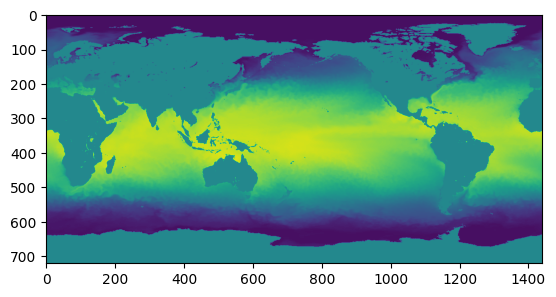

In [12]:
import matplotlib.pyplot as plt
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
plt.imshow(upper_air[0, 0, 14, :, :].cpu().detach())

In [13]:
upper_air[0, 0, 15, :, :]

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]], device='cuda:0')

In [55]:
# One months
tar_id = 201
tar = True

from torch.utils.data import Dataset, DataLoader
class WeatherDatasetInfer(Dataset):
    def __init__(self, input_data, id=0, month=1):
        self.input = input_data
        self.t = month
        self.id = id

        
        self.input = self.input 
        print("input: ",self.input.shape)

    def __len__(self):
        return self.t
    

    def __getitem__(self, idx):
        upper_input = torch.tensor(self.input).permute(1, 0, 2, 3)[:, self.id + idx: self.id + idx + 16, :, :]
        if tar:
            target_surface = self.input[self.id + idx + 16, 0, :, :]
        else:
            target_surface = 0
        return upper_input, target_surface

test_dataset = WeatherDatasetInfer(normalized_data, id= tar_id - 17, month=12)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)

input:  torch.Size([214, 8, 721, 1440])


In [56]:
# infer 1month

DEVICE = torch.device("cuda:0")
the_model = torch.load('D:/Onedrive/Acdemic/weather/model/one_0005_250ep_bc4.tar')
the_model.to(DEVICE)
mse = []
datanc = []


with torch.no_grad():
    the_model.eval()
    for step, (upper_air, target_surface) in enumerate(test_loader):
        upper_air, target_surface = upper_air.to(DEVICE), target_surface.to(DEVICE)
        output = the_model(upper_air.cuda())
        
        with torch.no_grad():

            curmon = (3 + tar_id) % 12
            # 数据处理和绘图的代码块


            data1 = output[0, 0, 0, :, :].cpu().detach().numpy() * std_all.numpy()[0, 0, 0, 0] + mean_all.numpy()[0, 0, 0, 0]
            

            data1[ocean_mask] = None
            data11 = data1 - monthly_avg_temp[(curmon + step) % 12, :, :]

            tempdata1 = data11[340:380 ,760:960]


            print("infer:{}".format(np.nanmean(tempdata1)))

            if tar:
                data2 = target_surface[0, :, :].cpu().detach().numpy() * std_all.numpy()[0, 0, 0, 0] + mean_all.numpy()[0, 0, 0, 0]
                

                data2[ocean_mask] = None
                data22 = data2 - monthly_avg_temp[(curmon + step) % 12, :, :]

                tempdata2 = data22[340:380 ,760:960]


                print("obs:{}".format(np.nanmean(tempdata2)))
                print("err:{}".format(np.abs(np.nanmean(data1 - data2))))
            mse.append(np.abs(np.nanmean(data1 - data2)))
            datanc.append(data1)

C:\Users\DELL\AppData\Local\Temp\ipykernel_46024\1515370958.py:21: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  upper_input = torch.tensor(self.input).permute(1, 0, 2, 3)[:, self.id + idx: self.id + idx + 16, :, :]


infer:0.3961123824119568
obs:-0.6013544797897339
err:0.09608720242977142
infer:0.3563464283943176
obs:-0.38518065214157104
err:0.2393662929534912
infer:0.005078285001218319
obs:0.17191657423973083
err:0.184688538312912
infer:-0.17569036781787872
obs:0.30285584926605225
err:0.031030207872390747
infer:0.2140585035085678
obs:0.6044688820838928
err:0.04283786565065384
infer:0.3863978385925293
obs:1.0108585357666016
err:0.3305564820766449
infer:1.0852023363113403
obs:1.1477468013763428
err:0.6906741261482239
infer:1.4191633462905884
obs:1.448281168937683
err:0.9440764784812927
infer:1.5110000371932983
obs:1.7680941820144653
err:0.6782631278038025
infer:1.2665568590164185
obs:1.7835944890975952
err:0.18822158873081207
infer:1.566365361213684
obs:1.9882614612579346
err:0.07186993211507797
infer:1.9239189624786377
obs:2.1219980716705322
err:0.06522677093744278


In [110]:
print(np.mean(mse), np.median(mse))

0.29690823 0.18645507


In [112]:
len(datanc)

12

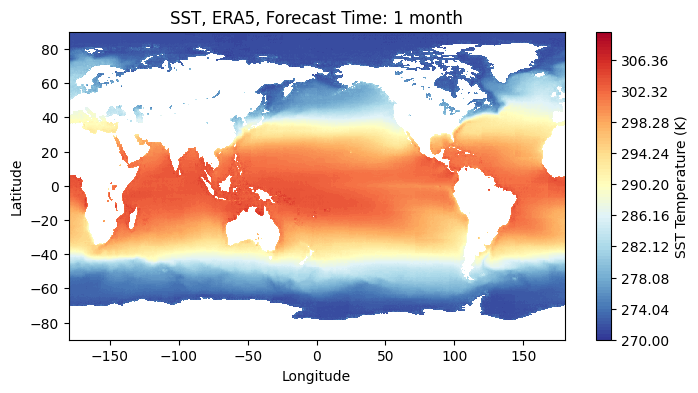

In [42]:

fig = plt.figure(figsize=(8, 4))

data = np.flipud(data1)
# Plot the data
plt.contourf(lon, lat, data, levels=np.linspace(270, 310, num=100), cmap='RdYlBu_r')

# Add colorbar
cbar = plt.colorbar()
cbar.set_label('SST Temperature (K)')

# Add labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('SST, ERA5, Forecast Time: 1 month')
# Set the aspect of the plot to be equal

# Show the plot
plt.show()

In [62]:
np.median(mse)

0.15131323

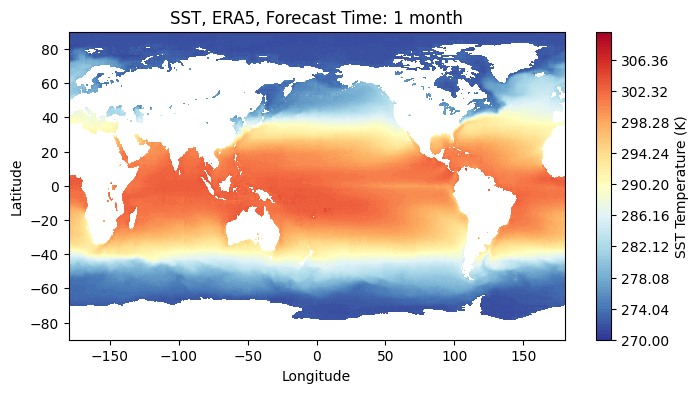

In [26]:
lons = np.linspace(-180, 180, 1440)
lats = np.linspace(-90, 90, 721)
lon, lat = np.meshgrid(lons, lats)
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Assuming 'data' is a 721x1440 matrix representing ERA5 lat/lon data
# Here I'll create a mock 'data' array as we do not have the actual data.
# The actual data should be loaded from the ERA5 dataset.


# Define the size of the figure
fig = plt.figure(figsize=(8, 4))

data = np.flipud(data1)
# Plot the data
plt.contourf(lon, lat, data, levels=np.linspace(270, 310, num=100), cmap='RdYlBu_r')

# Add colorbar
cbar = plt.colorbar()
cbar.set_label('SST Temperature (K)')

# Add labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('SST, ERA5, Forecast Time: 1 month')
# Set the aspect of the plot to be equal

# Show the plot
plt.show()

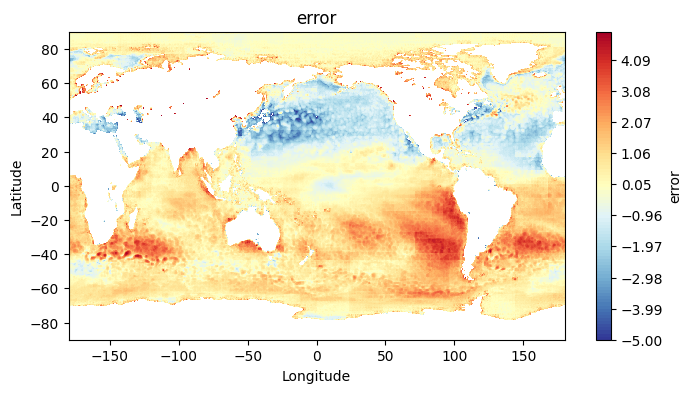

In [43]:
fig = plt.figure(figsize=(8, 4))

data = np.flipud(data1 - data2)

plt.contourf(lon, lat, data, levels=np.linspace(-5, 5, num=100), cmap='RdYlBu_r')


cbar = plt.colorbar()
cbar.set_label('error')

# Add labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('error')
# Set the aspect of the plot to be equal

# Show the plot
plt.show()

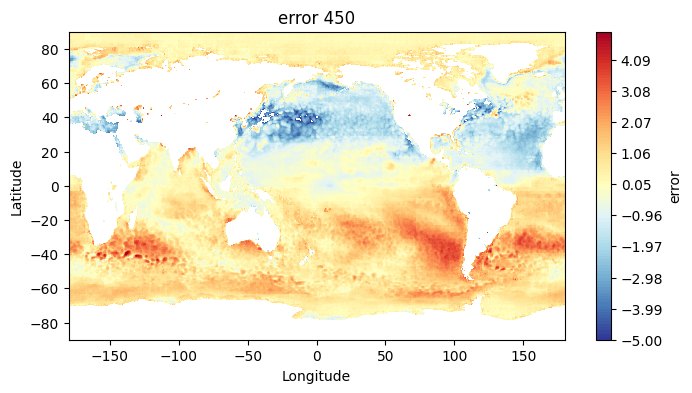

In [45]:
fig = plt.figure(figsize=(8, 4))

data = np.flipud(data1 - data2)

plt.contourf(lon, lat, data, levels=np.linspace(-5, 5, num=100), cmap='RdYlBu_r')


cbar = plt.colorbar()
cbar.set_label('error')

# Add labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('error 450')
# Set the aspect of the plot to be equal

# Show the plot
plt.show()

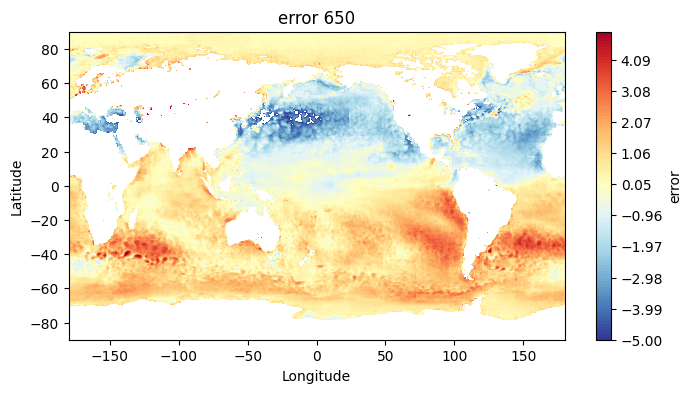

In [47]:
fig = plt.figure(figsize=(8, 4))

data = np.flipud(data1 - data2)

plt.contourf(lon, lat, data, levels=np.linspace(-5, 5, num=100), cmap='RdYlBu_r')


cbar = plt.colorbar()
cbar.set_label('error')

# Add labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('error 650')
# Set the aspect of the plot to be equal

# Show the plot
plt.show()

## write nc

In [32]:
import xarray as xr
test = xr.open_dataset('E:/data/one_level_23.nc')

In [2]:
test['sst']

<xarray.DataArray 'sst' (time: 14, expver: 2, latitude: 721, longitude: 1440)>
[29070720 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * expver     (expver) int32 1 5
  * time       (time) datetime64[ns] 2023-01-01 2023-02-01 ... 2024-02-01
Attributes:
    units:      K
    long_name:  Sea surface temperature

In [3]:
import pandas as pd
timeli = pd.date_range(start='2023-01-01', end='2024-01-01', freq='M').strftime('%Y%m').tolist()
#del timeli[2:4]

pd.to_datetime(timeli, format='%Y%m')

DatetimeIndex(['2023-01-01', '2023-02-01', '2023-03-01', '2023-04-01',
               '2023-05-01', '2023-06-01', '2023-07-01', '2023-08-01',
               '2023-09-01', '2023-10-01', '2023-11-01', '2023-12-01'],
              dtype='datetime64[ns]', freq=None)

In [4]:
import numpy as np
datanc = np.load('datanc.npy')
datanc2 = np.load('datanc2.npy')
datanc3 = np.load('datanc3.npy')
obs = np.load('obs.npy')

In [10]:
pd.to_datetime(timeli, format='%Y%m').strftime('%Y%m')

Index(['202301', '202302', '202303', '202304', '202305', '202306', '202307',
       '202308', '202309', '202310', '202311', '202312'],
      dtype='object')

In [11]:
#w表示写入
data_NC.close()
# 关闭文件，当报错后一定要单独运行一下这一行，把nc文件关闭，不然他一直处于打开状态，会报错，然后找到#当前nc文件删除，重新运行
import pandas as pd
import netCDF4 as nc
data_NC = nc.Dataset('E:/data/SST_predict.nc', 'w', format='NETCDF4')

# 创建维度，createDimension（维度名称，维度长度）
data_NC.createDimension('lat', test['sst'].latitude.shape[0])
data_NC.createDimension('lon',test['sst'].longitude.shape[0])
data_NC.createDimension('time',12)
 
# 创建维度变量，createVariable（变量名，值类型，维度）注意这里的维度就是上面创建维度的名称，不然会#报错
data_NC.createVariable("lat", 'f', ('lat'))
data_NC.createVariable("lon", 'f', ('lon'))
data_NC.createVariable("time", 'f', ('time'))
 
# 创建变量，("对应的函数值", '数据类型', ( "变量一", "变量二"))我创建的是二维数组
data_NC.createVariable("month_lead1", 'f', ("time", "lat", "lon"))
data_NC.createVariable("month_lead2", 'f', ("time", "lat", "lon"))
data_NC.createVariable("month_lead3", 'f', ("time", "lat", "lon"))
data_NC.createVariable("obs", 'f', ("time", "lat", "lon"))

# 给维度填充数据，这里的数据是需要自己提前准备好，一般是linspace
# data_NC.variables['维度名'][:] = 维度数据
 
data_NC.variables['lat'][:] = test['sst'].latitude.values
data_NC.variables['lon'][:] = test['sst'].longitude.values

timeli = pd.date_range(start='2023-01-01', end='2024-01-01', freq='M').strftime('%Y%m').tolist()
#del timeli[2:4]

data_NC.variables['time'][:] = pd.to_datetime(timeli, format='%Y%m').strftime('%Y%m')
 
# 给变量填充数据，和维度填充数据方式是一样的，就是存进去
for i in range(12):
    data_NC.variables['month_lead1'][i, :, :] = datanc[i]
    data_NC.variables['month_lead2'][i, :, :] = datanc3[i]
    data_NC.variables['month_lead3'][i, :, :] = datanc3[i]
    data_NC.variables['obs'][i, :, :] = obs[i]

# 关闭文件，当报错后一定要单独运行一下这一行，把nc文件关闭，不然他一直处于打开状态，会报错，然后找到#当前nc文件删除，重新运行
data_NC.close()

In [53]:
len(datanc2)

12

In [68]:
import xarray as xr
xr.open_dataset('E:/data/SST_predict_24.nc')

<xarray.Dataset>
Dimensions:  (lat: 721, lon: 1440, time: 12)
Coordinates:
  * lat      (lat) float32 90.0 89.75 89.5 89.25 ... -89.25 -89.5 -89.75 -90.0
  * lon      (lon) float32 0.0 0.25 0.5 0.75 1.0 ... 359.0 359.2 359.5 359.8
  * time     (time) float32 2.023e+05 2.023e+05 ... 2.023e+05 2.023e+05
Data variables:
    sst_pre  (time, lat, lon) float32 ...

In [57]:
np.save('datanc.npy', datanc)

In [52]:
np.save('datanc2.npy', datanc2)

In [40]:
np.save('datanc3.npy', datanc3)
np.save('obs.npy', obs)

In [62]:
import numpy as np
feb = np.load('feb.npy')
mar = np.load('march.npy')
apr = np.load('apr.npy')
may = np.load('may.npy')
jun = np.load('june.npy')

In [1]:
import xarray as xr
test = xr.open_dataset('E:/data/one_level_23.nc')

In [64]:
test['sst']

<xarray.DataArray 'sst' (time: 14, expver: 2, latitude: 721, longitude: 1440)>
[29070720 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * expver     (expver) int32 1 5
  * time       (time) datetime64[ns] 2023-01-01 2023-02-01 ... 2024-02-01
Attributes:
    units:      K
    long_name:  Sea surface temperature

In [65]:
import pandas as pd
timeli = pd.date_range(start='2024-02-01', end='2024-07-01', freq='M').strftime('%Y%m').tolist()
#del timeli[2:4]

pd.to_datetime(timeli, format='%Y%m')

DatetimeIndex(['2024-02-01', '2024-03-01', '2024-04-01', '2024-05-01',
               '2024-06-01'],
              dtype='datetime64[ns]', freq=None)

In [66]:
pd.to_datetime(timeli, format='%Y%m').strftime('%Y%m')

Index(['202402', '202403', '202404', '202405', '202406'], dtype='object')

In [67]:
#w表示写入
data_NC.close()
# 关闭文件，当报错后一定要单独运行一下这一行，把nc文件关闭，不然他一直处于打开状态，会报错，然后找到#当前nc文件删除，重新运行
import pandas as pd
import netCDF4 as nc
data_NC = nc.Dataset('E:/data/SST_predict_24.nc', 'w', format='NETCDF4')

# 创建维度，createDimension（维度名称，维度长度）
data_NC.createDimension('lat', test['sst'].latitude.shape[0])
data_NC.createDimension('lon',test['sst'].longitude.shape[0])
data_NC.createDimension('time',12)
 
# 创建维度变量，createVariable（变量名，值类型，维度）注意这里的维度就是上面创建维度的名称，不然会#报错
data_NC.createVariable("lat", 'f', ('lat'))
data_NC.createVariable("lon", 'f', ('lon'))
data_NC.createVariable("time", 'f', ('time'))
 
# 创建变量，("对应的函数值", '数据类型', ( "变量一", "变量二"))我创建的是二维数组
data_NC.createVariable("sst_pre", 'f', ("time", "lat", "lon"))


# 给维度填充数据，这里的数据是需要自己提前准备好，一般是linspace
# data_NC.variables['维度名'][:] = 维度数据
 
data_NC.variables['lat'][:] = test['sst'].latitude.values
data_NC.variables['lon'][:] = test['sst'].longitude.values

timeli = pd.date_range(start='2023-01-01', end='2024-01-01', freq='M').strftime('%Y%m').tolist()
#del timeli[2:4]

data_NC.variables['time'][:] = pd.to_datetime(timeli, format='%Y%m').strftime('%Y%m')
 
# 给变量填充数据，和维度填充数据方式是一样的，就是存进去

data_NC.variables['sst_pre'][0, :, :] = feb
data_NC.variables['sst_pre'][1, :, :] = mar
data_NC.variables['sst_pre'][2, :, :] = apr
data_NC.variables['sst_pre'][3, :, :] = may
data_NC.variables['sst_pre'][4, :, :] = jun


# 关闭文件，当报错后一定要单独运行一下这一行，把nc文件关闭，不然他一直处于打开状态，会报错，然后找到#当前nc文件删除，重新运行
data_NC.close()

## to product 2024 0510

In [25]:
# One months
tar_id = 17
month = 160 - tar_id + 1
from torch.utils.data import Dataset, DataLoader
class WeatherDatasetInfer(Dataset):
    def __init__(self, input_data, id=0, month=1):
        self.input = input_data
        self.t = month
        self.id = id

        
        self.input = self.input 
        print("input: ",self.input.shape)

    def __len__(self):
        return self.t
    

    def __getitem__(self, idx):
        upper_input = torch.tensor(self.input).permute(1, 0, 2, 3)[:, self.id + idx: self.id + idx + 16, :, :]
        target_surface = self.input[self.id + idx + 16, 0, :, :]
        return upper_input, target_surface

test_dataset = WeatherDatasetInfer(normalized_data, id= tar_id - 17, month=month)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)

input:  torch.Size([160, 8, 721, 1440])


In [6]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

DEVICE = torch.device("cuda:0")
model1 = torch.load('D:/Onedrive/Acdemic/weather/model/one_0005_250ep_bc4.tar')
model2 = torch.load('D:/Onedrive/Acdemic/weather/model/one_0005_450ep_bc4.tar')
model3 = torch.load('D:/Onedrive/Acdemic/weather/model/one_0005_650ep_bc4.tar')
model1.to(DEVICE)
model2.to(DEVICE)
model3.to(DEVICE)
model_list = []
model_list.append(model1)
model_list.append(model2)
model_list.append(model3)

In [12]:
def cal_rmse(pre, obs):
    index = np.full((721, 1440), False, dtype=bool)
    index[90*4: 100*4, 270*4: 280*4] = True
    index[120*4: 135*4, 300*4: 330*4] = True
    index[105*4: 155*4, 260*4: 320*4] = True
    index[0*4: 20*4, 20*4: 150*4] = True
    index[90:110, 170:210] = True
    obs1 = obs[index]
    pre1 = pre[index]
    rmse = np.sqrt(np.mean((obs1[~np.isnan(obs1)].flatten() - pre1[~np.isnan(pre1)].flatten())**2))
    r2 = np.corrcoef(obs1[~np.isnan(obs1)].flatten(), pre1[~np.isnan(pre1)].flatten())[0, 1]
    return rmse, r2

In [29]:
best_models_sst = []
best_models_ssta = []
with torch.no_grad():
    for step, (upper_air, target_surface) in enumerate(test_loader):
        min_rmse = float('inf')  
        best_model_index = -1
        temp_result = []
        for i in range(3):
            the_model = model_list[i]
            the_model.eval()
            upper_air, target_surface = upper_air.to(DEVICE), target_surface.to(DEVICE)
            output = the_model(upper_air.cuda())
            
    
    
            sst1 = output[0, 0, 0, :, :].cpu().detach().numpy() * std_all.numpy()[0, 0, 0, 0] + mean_all.numpy()[0, 0, 0, 0]
            sst2 = target_surface[0, :, :].cpu().detach().numpy() * std_all.numpy()[0, 0, 0, 0] + mean_all.numpy()[0, 0, 0, 0]
    
            sst1[ocean_mask] = None
            sst2[ocean_mask] = None
            temp_result.append(sst1)
            ssta1 = sst1 - monthly_avg_temp[(12+step) % 12, :, :]
            ssta2 = sst2 - monthly_avg_temp[(12+step) % 12, :, :]
    
            rmse, r2 = cal_rmse(ssta1, ssta2)
            if rmse < min_rmse:
                min_rmse = rmse
                best_model_index = i

            print(f"index {step + 17}, RMSE: {rmse}, r2: {r2}, model: {i}")
            
        best_models_sst.append(temp_result[best_model_index])

C:\Users\DELL\AppData\Local\Temp\ipykernel_8096\1220867640.py:20: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  upper_input = torch.tensor(self.input).permute(1, 0, 2, 3)[:, self.id + idx: self.id + idx + 16, :, :]


index 17, RMSE: 0.8169518709182739, r2: 0.153226709813133, model: 0
index 17, RMSE: 0.7980813980102539, r2: 0.19027134247711372, model: 1
index 17, RMSE: 0.7130180597305298, r2: 0.2697042254493759, model: 2
index 18, RMSE: 1.0568276643753052, r2: 0.0002733382477775522, model: 0
index 18, RMSE: 0.9205535054206848, r2: 0.08341953409505327, model: 1
index 18, RMSE: 0.9021976590156555, r2: 0.04413290756232388, model: 2
index 19, RMSE: 1.7636748552322388, r2: -0.1082583339977, model: 0
index 19, RMSE: 1.6661274433135986, r2: -0.08658764325520436, model: 1
index 19, RMSE: 1.7928179502487183, r2: -0.08297864302624611, model: 2
index 20, RMSE: 2.0328104496002197, r2: 0.07651221528803609, model: 0
index 20, RMSE: 1.991868257522583, r2: 0.11016493120256185, model: 1
index 20, RMSE: 2.059905529022217, r2: 0.07647700350225631, model: 2
index 21, RMSE: 1.7612290382385254, r2: 0.16385753716214982, model: 0
index 21, RMSE: 1.9083635807037354, r2: 0.17501710039405272, model: 1
index 21, RMSE: 1.848733

In [34]:
#w表示写入
#data_NC.close()
# 关闭文件，当报错后一定要单独运行一下这一行，把nc文件关闭，不然他一直处于打开状态，会报错，然后找到#当前nc文件删除，重新运行
import pandas as pd
import netCDF4 as nc
data_NC = nc.Dataset('E:/data/SST_predict_2011_2022.nc', 'w', format='NETCDF4')

# 创建维度，createDimension（维度名称，维度长度）
data_NC.createDimension('lat', test['sst'].latitude.shape[0])
data_NC.createDimension('lon',test['sst'].longitude.shape[0])
data_NC.createDimension('time',144)
 
# 创建维度变量，createVariable（变量名，值类型，维度）注意这里的维度就是上面创建维度的名称，不然会#报错
data_NC.createVariable("lat", 'f', ('lat'))
data_NC.createVariable("lon", 'f', ('lon'))
data_NC.createVariable("time", 'f', ('time'))
 
# 创建变量，("对应的函数值", '数据类型', ( "变量一", "变量二"))我创建的是二维数组
data_NC.createVariable("month_lead1", 'f', ("time", "lat", "lon"))

data_NC.createVariable("obs", 'f', ("time", "lat", "lon"))

# 给维度填充数据，这里的数据是需要自己提前准备好，一般是linspace
# data_NC.variables['维度名'][:] = 维度数据
 
data_NC.variables['lat'][:] = test['sst'].latitude.values
data_NC.variables['lon'][:] = test['sst'].longitude.values

timeli = pd.date_range(start='2011-01-01', end='2023-01-01', freq='M').strftime('%Y%m').tolist()
#del timeli[2:4]

data_NC.variables['time'][:] = pd.to_datetime(timeli, format='%Y%m').strftime('%Y%m')
 
# 给变量填充数据，和维度填充数据方式是一样的，就是存进去
for i in range(144):
    data_NC.variables['month_lead1'][i, :, :] = best_models_sst[i]


# 关闭文件，当报错后一定要单独运行一下这一行，把nc文件关闭，不然他一直处于打开状态，会报错，然后找到#当前nc文件删除，重新运行
data_NC.close()

In [44]:

test
test = test.drop_vars('month_lead2')
test = test.drop_vars('month_lead3')
test = test.drop_vars('obs')

In [47]:
test
test.to_netcdf("E:/data/SST_predict_2011_20221.nc", mode='w', format='NETCDF4', engine='netcdf4')